<a href="https://colab.research.google.com/github/Erman4u/IDS-Machine-Learning/blob/main/NSL_KDD_Biner_Klasifikasi_Tanpa_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset NSL-KDD
train_data = pd.read_csv('/content/drive/MyDrive/Dataset/kdd_train.csv')
# Melihat beberapa baris data

print(train_data.head())

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   


#EDA

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
train_data.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [ ]:
train_data.nunique()

,0
duration,2981
protocol_type,3
service,70
flag,11
src_bytes,3341
dst_bytes,9326
land,2
wrong_fragment,3
urgent,4
hot,28


In [ ]:
train_data.duplicated().sum()

np.int64(0)

In [ ]:
type = train_data['labels'].unique()
type

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [ ]:
type = type[1:]
type

array(['neptune', 'warezclient', 'ipsweep', 'portsweep', 'teardrop',
       'nmap', 'satan', 'smurf', 'pod', 'back', 'guess_passwd',
       'ftp_write', 'multihop', 'rootkit', 'buffer_overflow', 'imap',
       'warezmaster', 'phf', 'land', 'loadmodule', 'spy', 'perl'],
      dtype=object)

In [ ]:
train_data['labels'] = train_data['labels'].replace({
    'normal': 0,
    'neptune': 1, 'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,
    'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
    'ipsweep': 1, 'nmap': 1, 'portsweep': 1, 'satan': 1, 'mscan': 1, 'saint': 1,
    'ftp_write': 1, 'guess_passwd': 1, 'imap': 1, 'multihop': 1, 'phf': 1, 'spy': 1,
    'warezclient': 1, 'warezmaster': 1, 'sendmail': 1, 'named': 1, 'snmpgetattack': 1,
    'snmpguess': 1, 'xlock': 1, 'xsnoop': 1, 'httptunnel': 1,
    'buffer_overflow': 1, 'loadmodule': 1, 'perl': 1, 'rootkit': 1, 'ps': 1,
    'sqlattack': 1, 'xterm': 1
})

train_data['labels'] = train_data['labels'].astype(int)


/tmp/ipython-input-10-306450994.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['labels'] = train_data['labels'].replace({


In [ ]:
train_data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
7,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,1
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
9,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


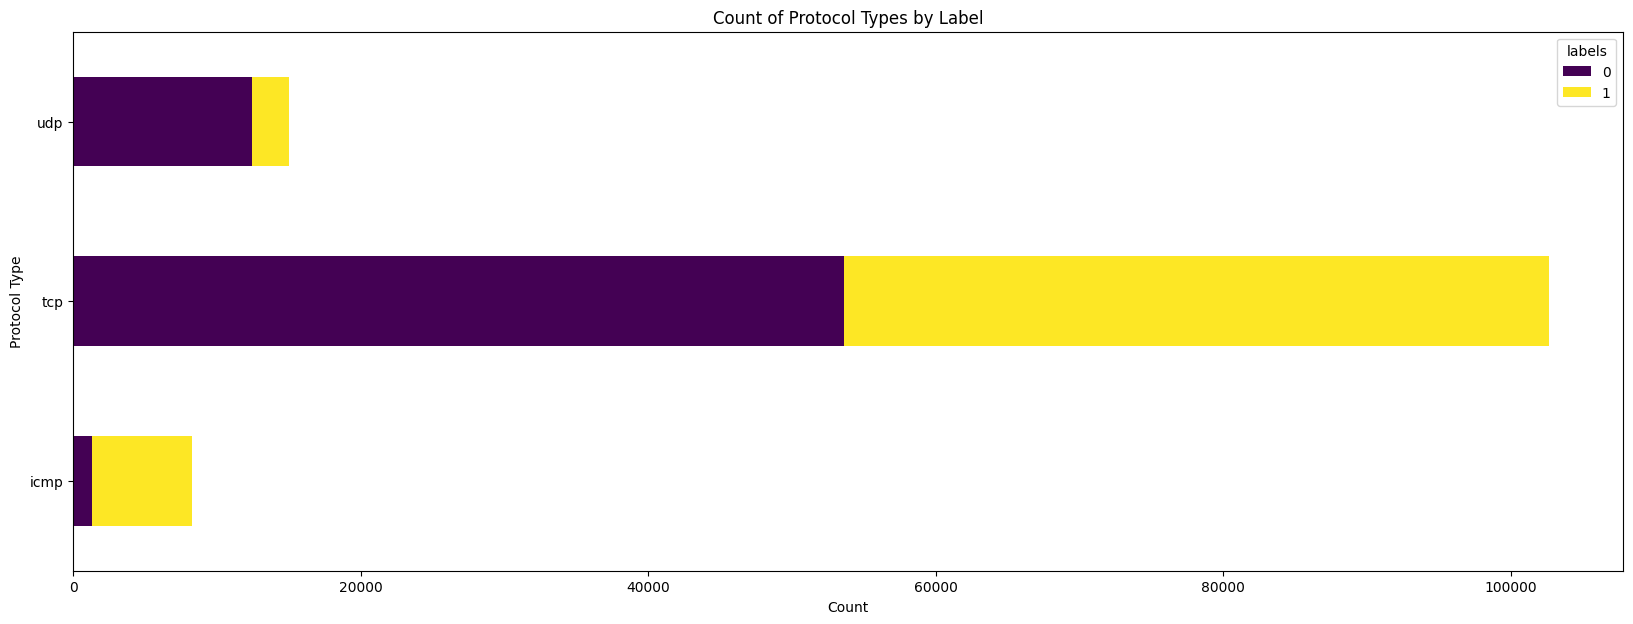

In [ ]:
count_data = train_data.groupby(['protocol_type', 'labels']).size().unstack(fill_value=0)
count_data.plot(kind='barh', stacked=True, figsize=(20,7), colormap='viridis')
plt.xlabel('Count')
plt.ylabel('Protocol Type')
plt.title('Count of Protocol Types by Label')
plt.show()


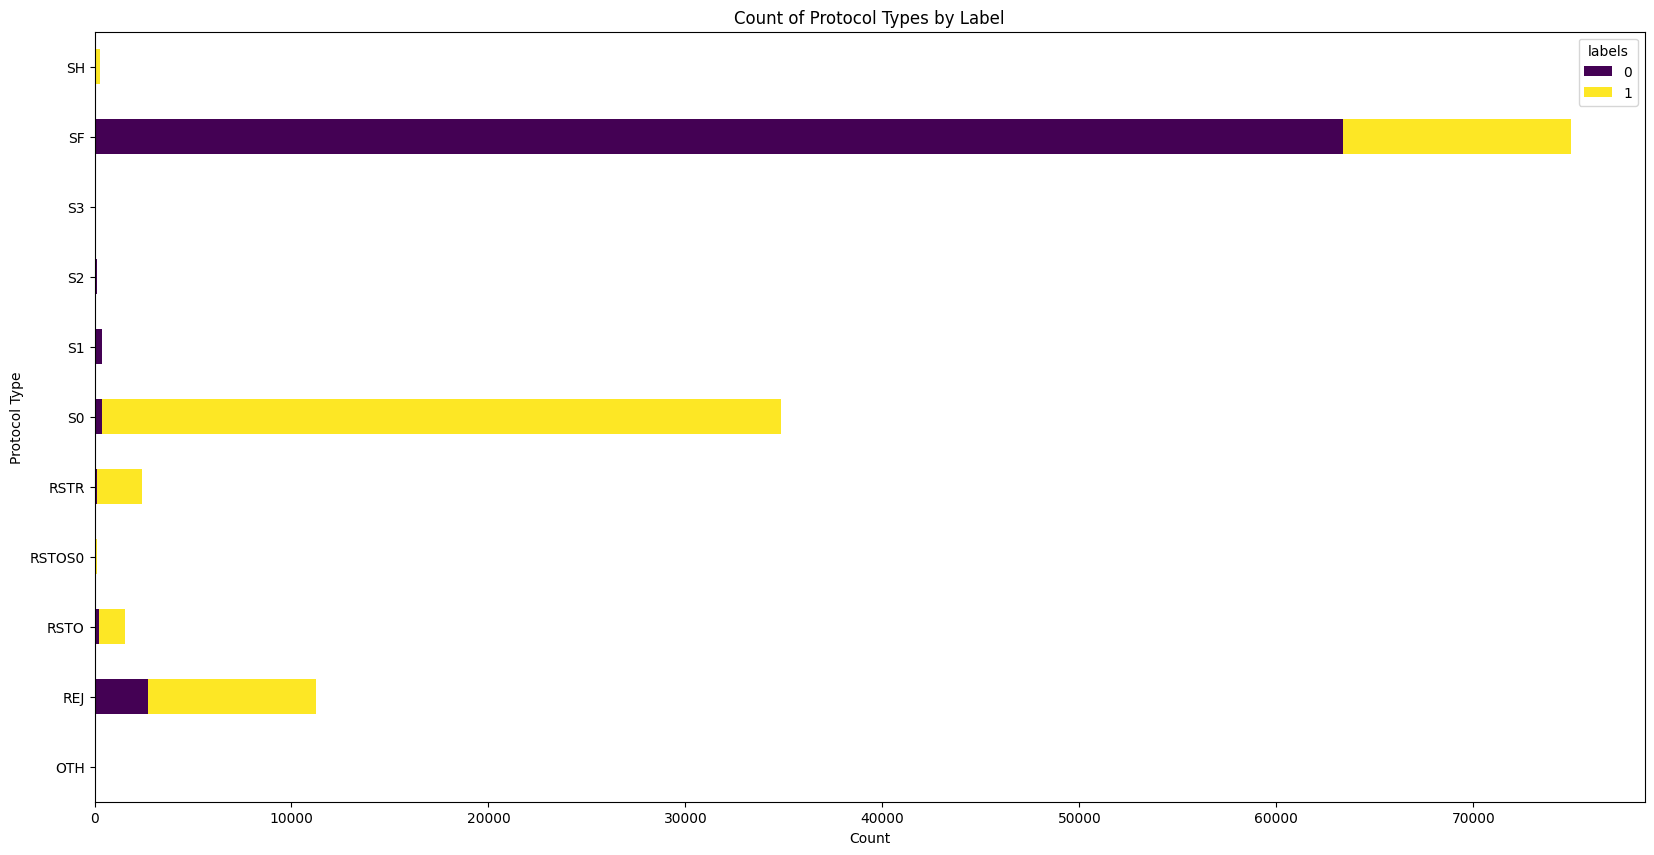

In [ ]:
count_data = train_data.groupby(['flag', 'labels']).size().unstack(fill_value=0)
count_data.plot(kind='barh', stacked=True, figsize=(20,10), colormap='viridis')
plt.xlabel('Count')
plt.ylabel('Protocol Type')
plt.title('Count of Protocol Types by Label')
plt.show()


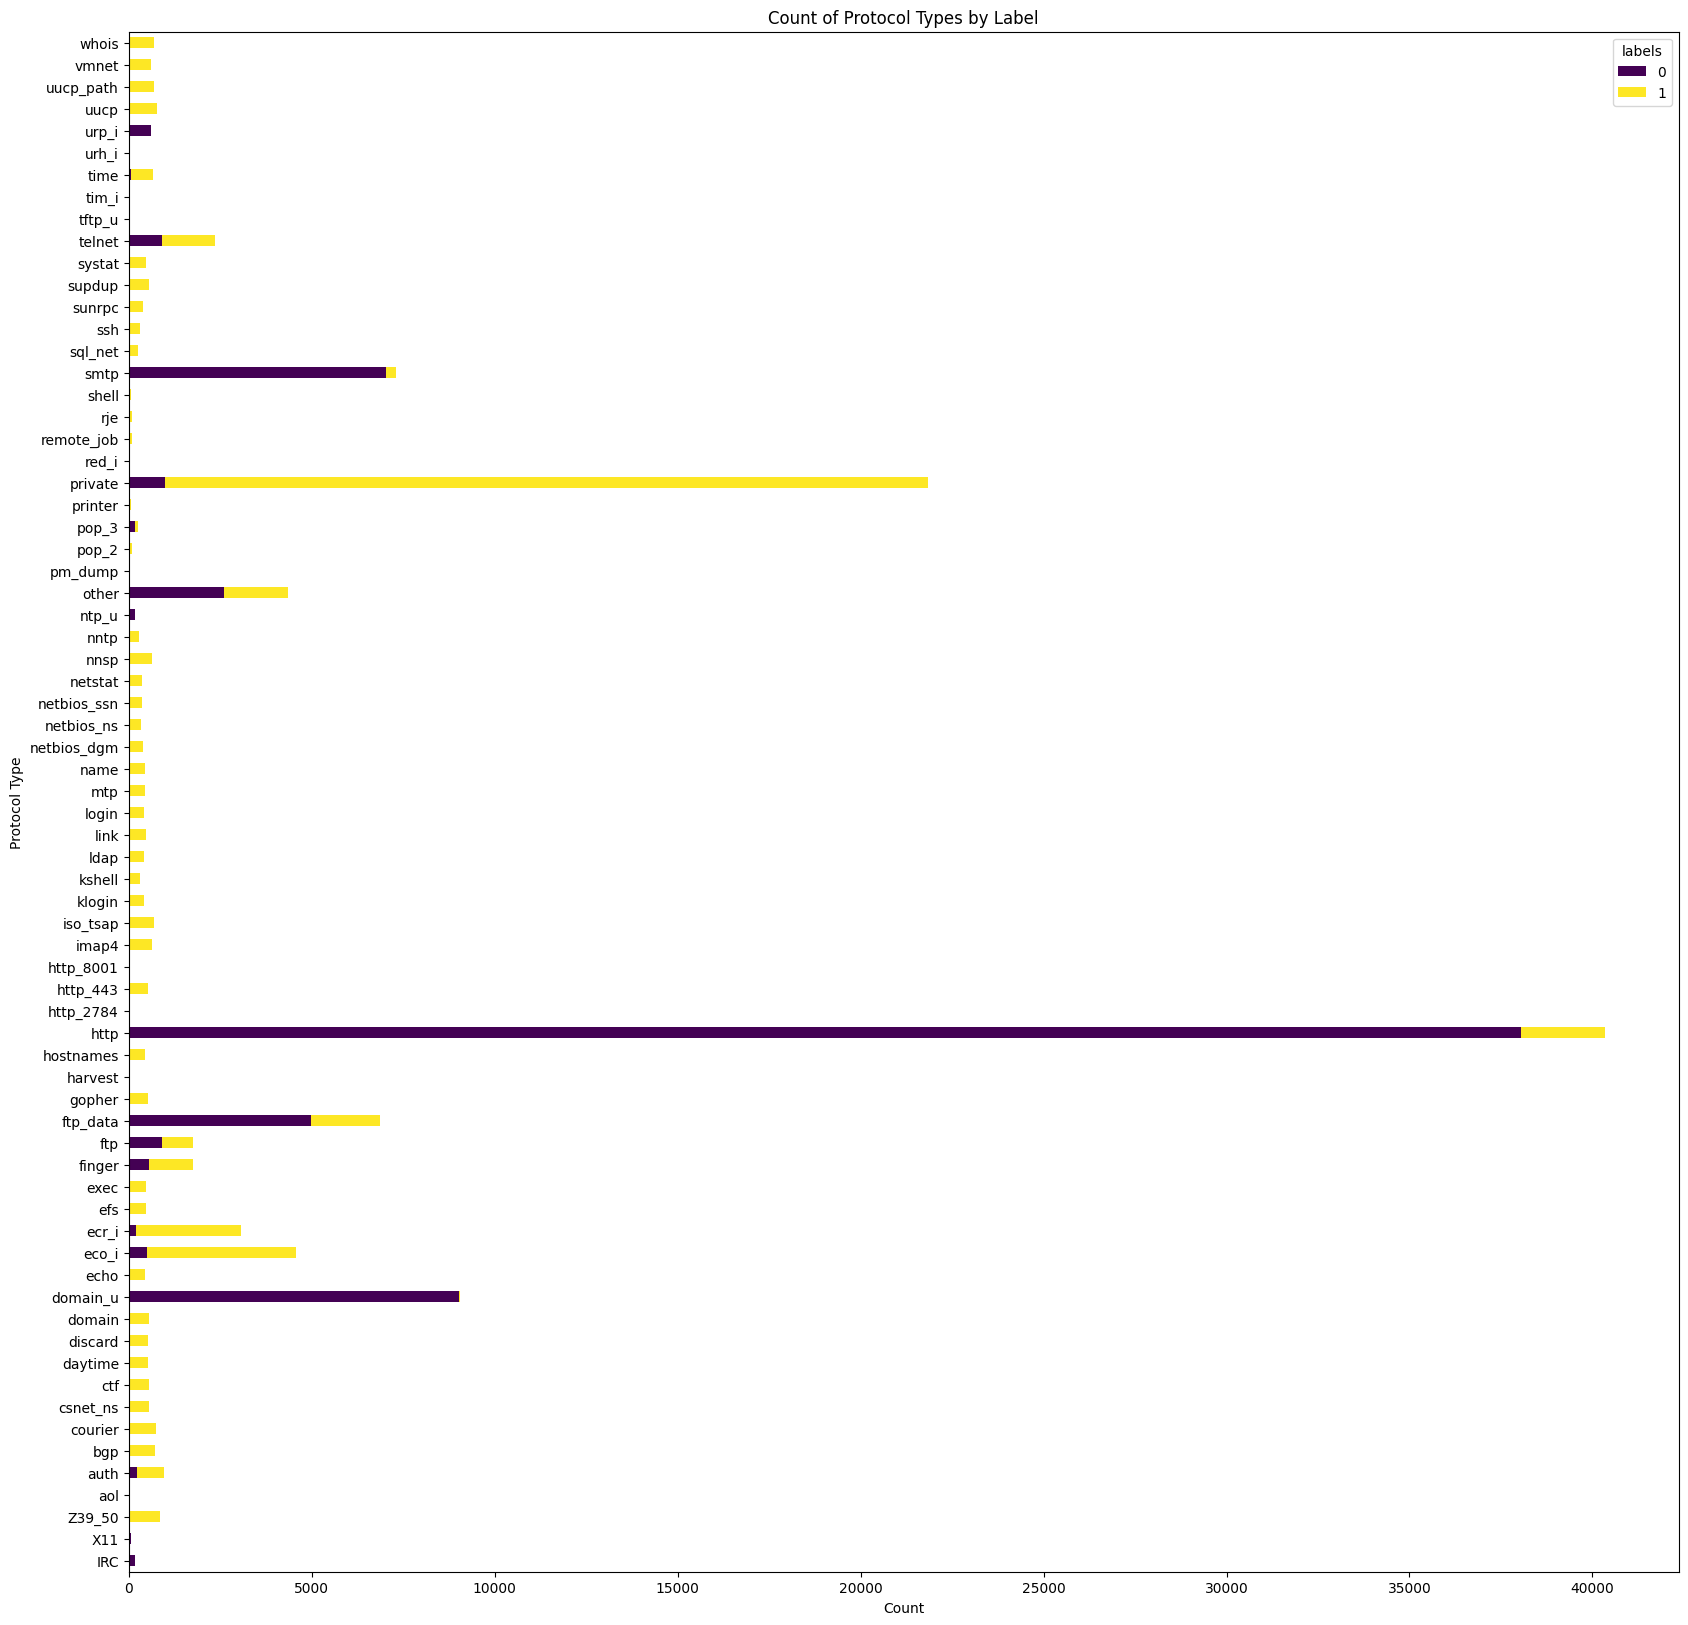

In [ ]:
count_data = train_data.groupby(['service', 'labels']).size().unstack(fill_value=0)
count_data.plot(kind='barh', stacked=True, figsize=(20,20), colormap='viridis')
plt.xlabel('Count')
plt.ylabel('Protocol Type')
plt.title('Count of Protocol Types by Label')
plt.show()


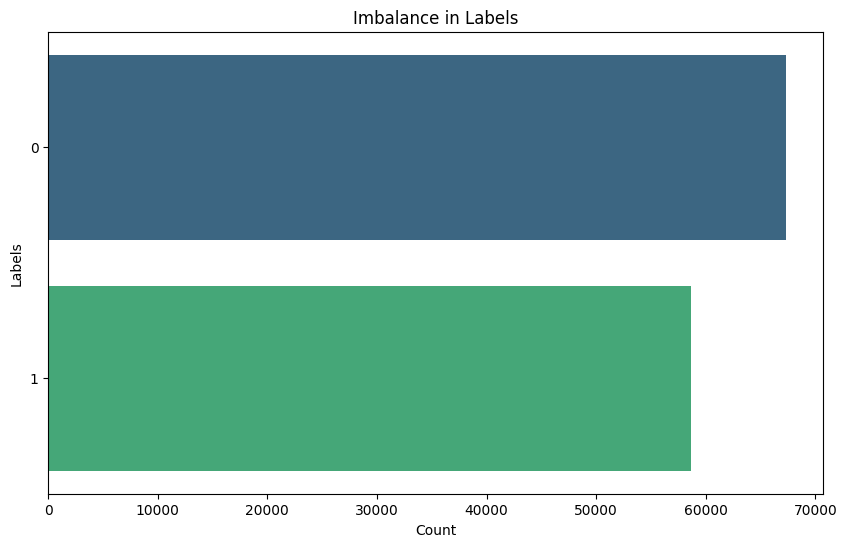

In [ ]:

# Plot imbalance data
plt.figure(figsize=(10, 6))
sns.countplot(y=train_data['labels'], hue=train_data['labels'], palette="viridis", legend=False)
plt.title("Imbalance in Labels")
plt.xlabel("Count")
plt.ylabel("Labels")
plt.show()

In [ ]:
c = len(train_data.select_dtypes(include=["number"]).columns)
c

39

In [ ]:
cols = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate']

In [ ]:
for col in train_data.select_dtypes(include=["object"]):
    print(col)

protocol_type
service
flag


In [ ]:
from sklearn.preprocessing import LabelEncoder

cols = ['protocol_type','service','flag']

for i in cols:
    en = LabelEncoder()

    train_data[i] = en.fit_transform(train_data[i])

In [ ]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,1,20,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


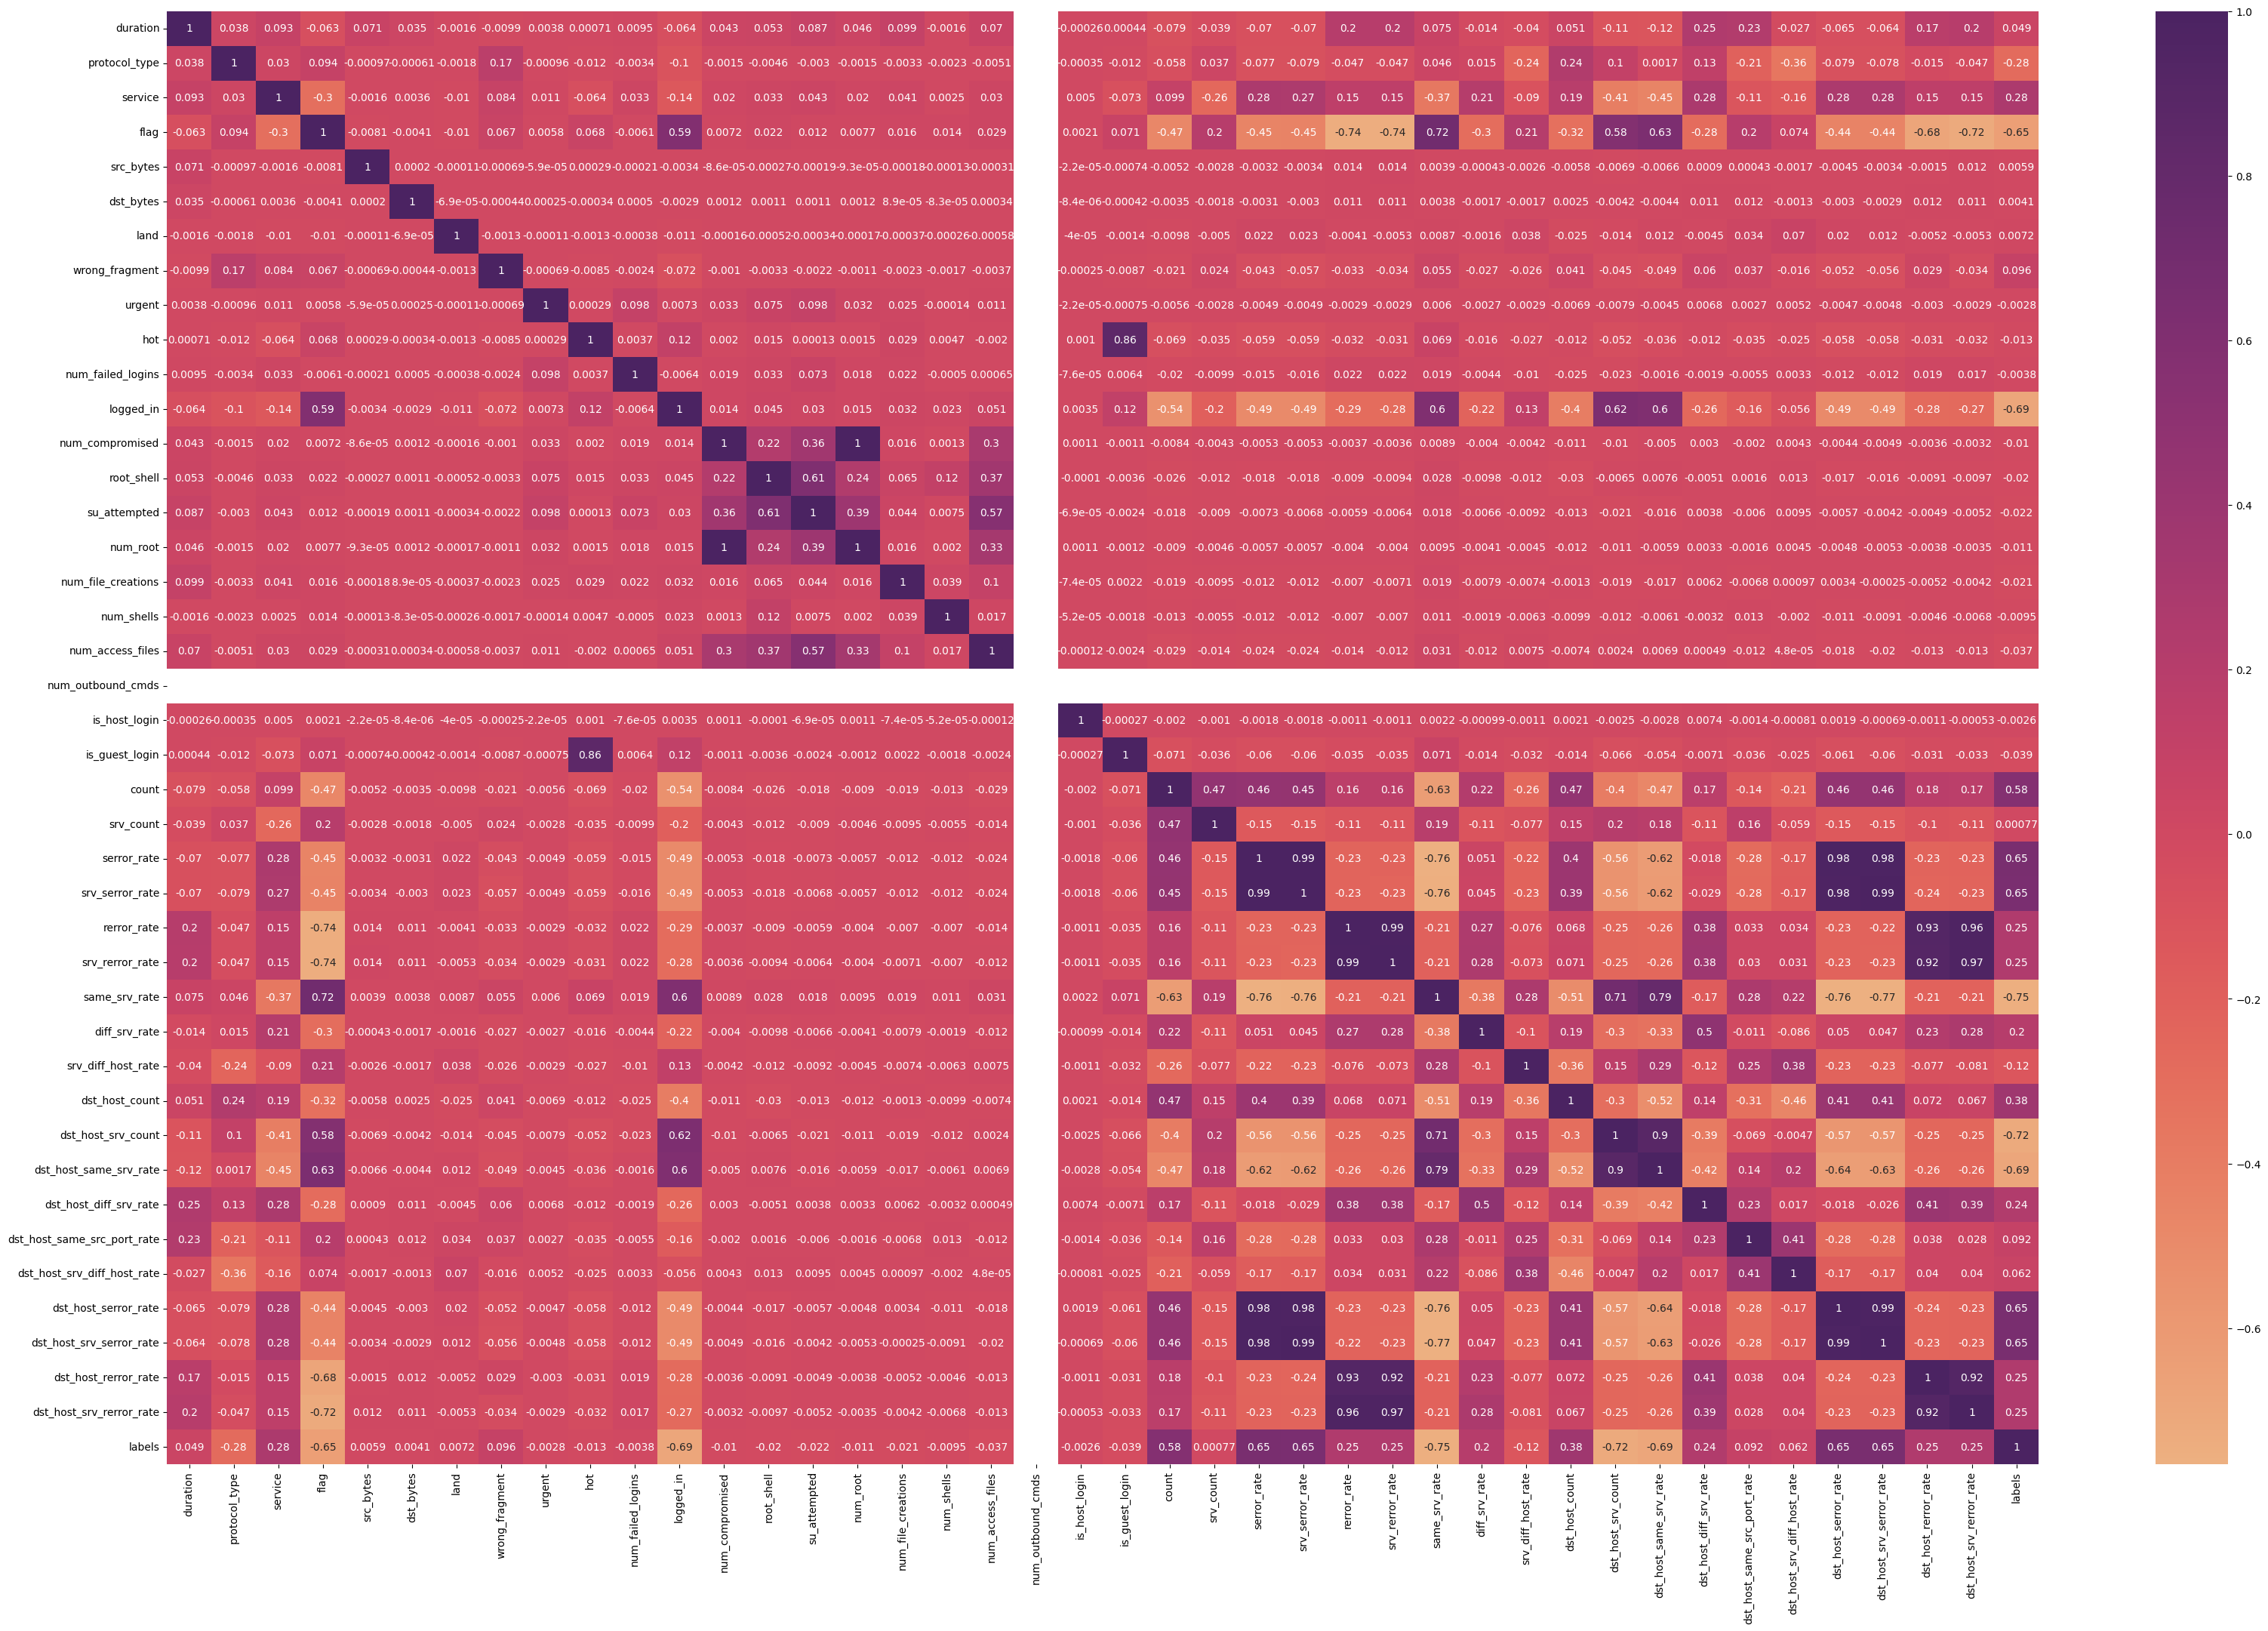

In [ ]:
plt.figure(figsize=(40,25))
sns.heatmap(train_data.corr(),annot= True,cmap = 'flare')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Misal data Anda dalam dataframe X
correlation_matrix = train_data.corr()  # Default adalah Pearson


In [ ]:
# Create correlation matrix
corr_matrix = train_data.corr().abs()
corr_matrix

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
duration,1.000000,0.038241,0.092858,0.063390,0.070737,0.034878,0.001553,0.009866,0.003830,0.000705,...,0.109776,0.116005,0.254195,0.228737,0.026669,0.064948,0.064361,0.173815,0.199024,0.048785
protocol_type,0.038241,1.000000,0.029994,0.093668,0.000974,0.000608,0.001757,0.169535,0.000965,0.011857,...,0.103919,0.001702,0.131380,0.209105,0.356183,0.079398,0.077925,0.015434,0.046938,0.281355
service,0.092858,0.029994,1.000000,0.304014,0.001631,0.003596,0.009952,0.084404,0.010980,0.064066,...,0.407696,0.452696,0.284072,0.111163,0.156211,0.281635,0.277594,0.150666,0.148405,0.276548
flag,0.063390,0.093668,0.304014,1.000000,0.008114,0.004096,0.010373,0.067214,0.005811,0.068437,...,0.582687,0.630118,0.283607,0.195689,0.073773,0.443441,0.443225,0.683310,0.718778,0.647073
src_bytes,0.070737,0.000974,0.001631,0.008114,1.000000,0.000204,0.000109,0.000693,0.000059,0.000295,...,0.006861,0.006572,0.000900,0.000431,0.001655,0.004503,0.003397,0.001468,0.012449,0.005921
dst_bytes,0.034878,0.000608,0.003596,0.004096,0.000204,1.000000,0.000069,0.000440,0.000248,0.000344,...,0.004224,0.004424,0.011031,0.011747,0.001281,0.003024,0.002944,0.011729,0.011223,0.004118
land,0.001553,0.001757,0.009952,0.010373,0.000109,0.000069,1.000000,0.001261,0.000109,0.001340,...,0.014159,0.011597,0.004516,0.033851,0.070474,0.019840,0.012276,0.005222,0.005303,0.007191
wrong_fragment,0.009866,0.169535,0.084404,0.067214,0.000693,0.000440,0.001261,1.000000,0.000692,0.008508,...,0.045240,0.048733,0.059797,0.037177,0.016252,0.051917,0.055917,0.028890,0.033682,0.095905
urgent,0.003830,0.000965,0.010980,0.005811,0.000059,0.000248,0.000109,0.000692,1.000000,0.000293,...,0.007897,0.004489,0.006840,0.002741,0.005176,0.004749,0.004834,0.002999,0.002912,0.002787
hot,0.000705,0.011857,0.064066,0.068437,0.000295,0.000344,0.001340,0.008508,0.000293,1.000000,...,0.051864,0.036293,0.012293,0.034536,0.024715,0.058222,0.058214,0.030555,0.031670,0.013083


In [ ]:
print("Kolom yang tersedia dalam dataset:")
print(train_data.columns.tolist())

columns_to_drop = [
    'num_outbound_cmds',  # Kolom dengan nilai NaN
    'is_host_login',      # Korelasi sangat rendah
    'land',               # Korelasi sangat rendah
    'urgent',             # Korelasi sangat rendah
    'wrong_fragment',     # Korelasi rendah
    'num_failed_logins',  # Korelasi rendah
    'num_compromised',    # Korelasi rendah
    'num_root',           # Korelasi rendah
    'num_shells',         # Korelasi rendah
    'dst_bytes',          # Korelasi rendah
    'hot'                 # Korelasi rendah
]

td_cleaned = train_data.drop(columns=columns_to_drop, errors='ignore')

print("\nKolom setelah dihapus:")
print(td_cleaned.columns.tolist())

Kolom yang tersedia dalam dataset:
['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'labels']

Kolom setelah dihapus:
['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'logged_in', 'root_shell', 'su_attempted', 'num_file_creations', 'num_access_files', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 

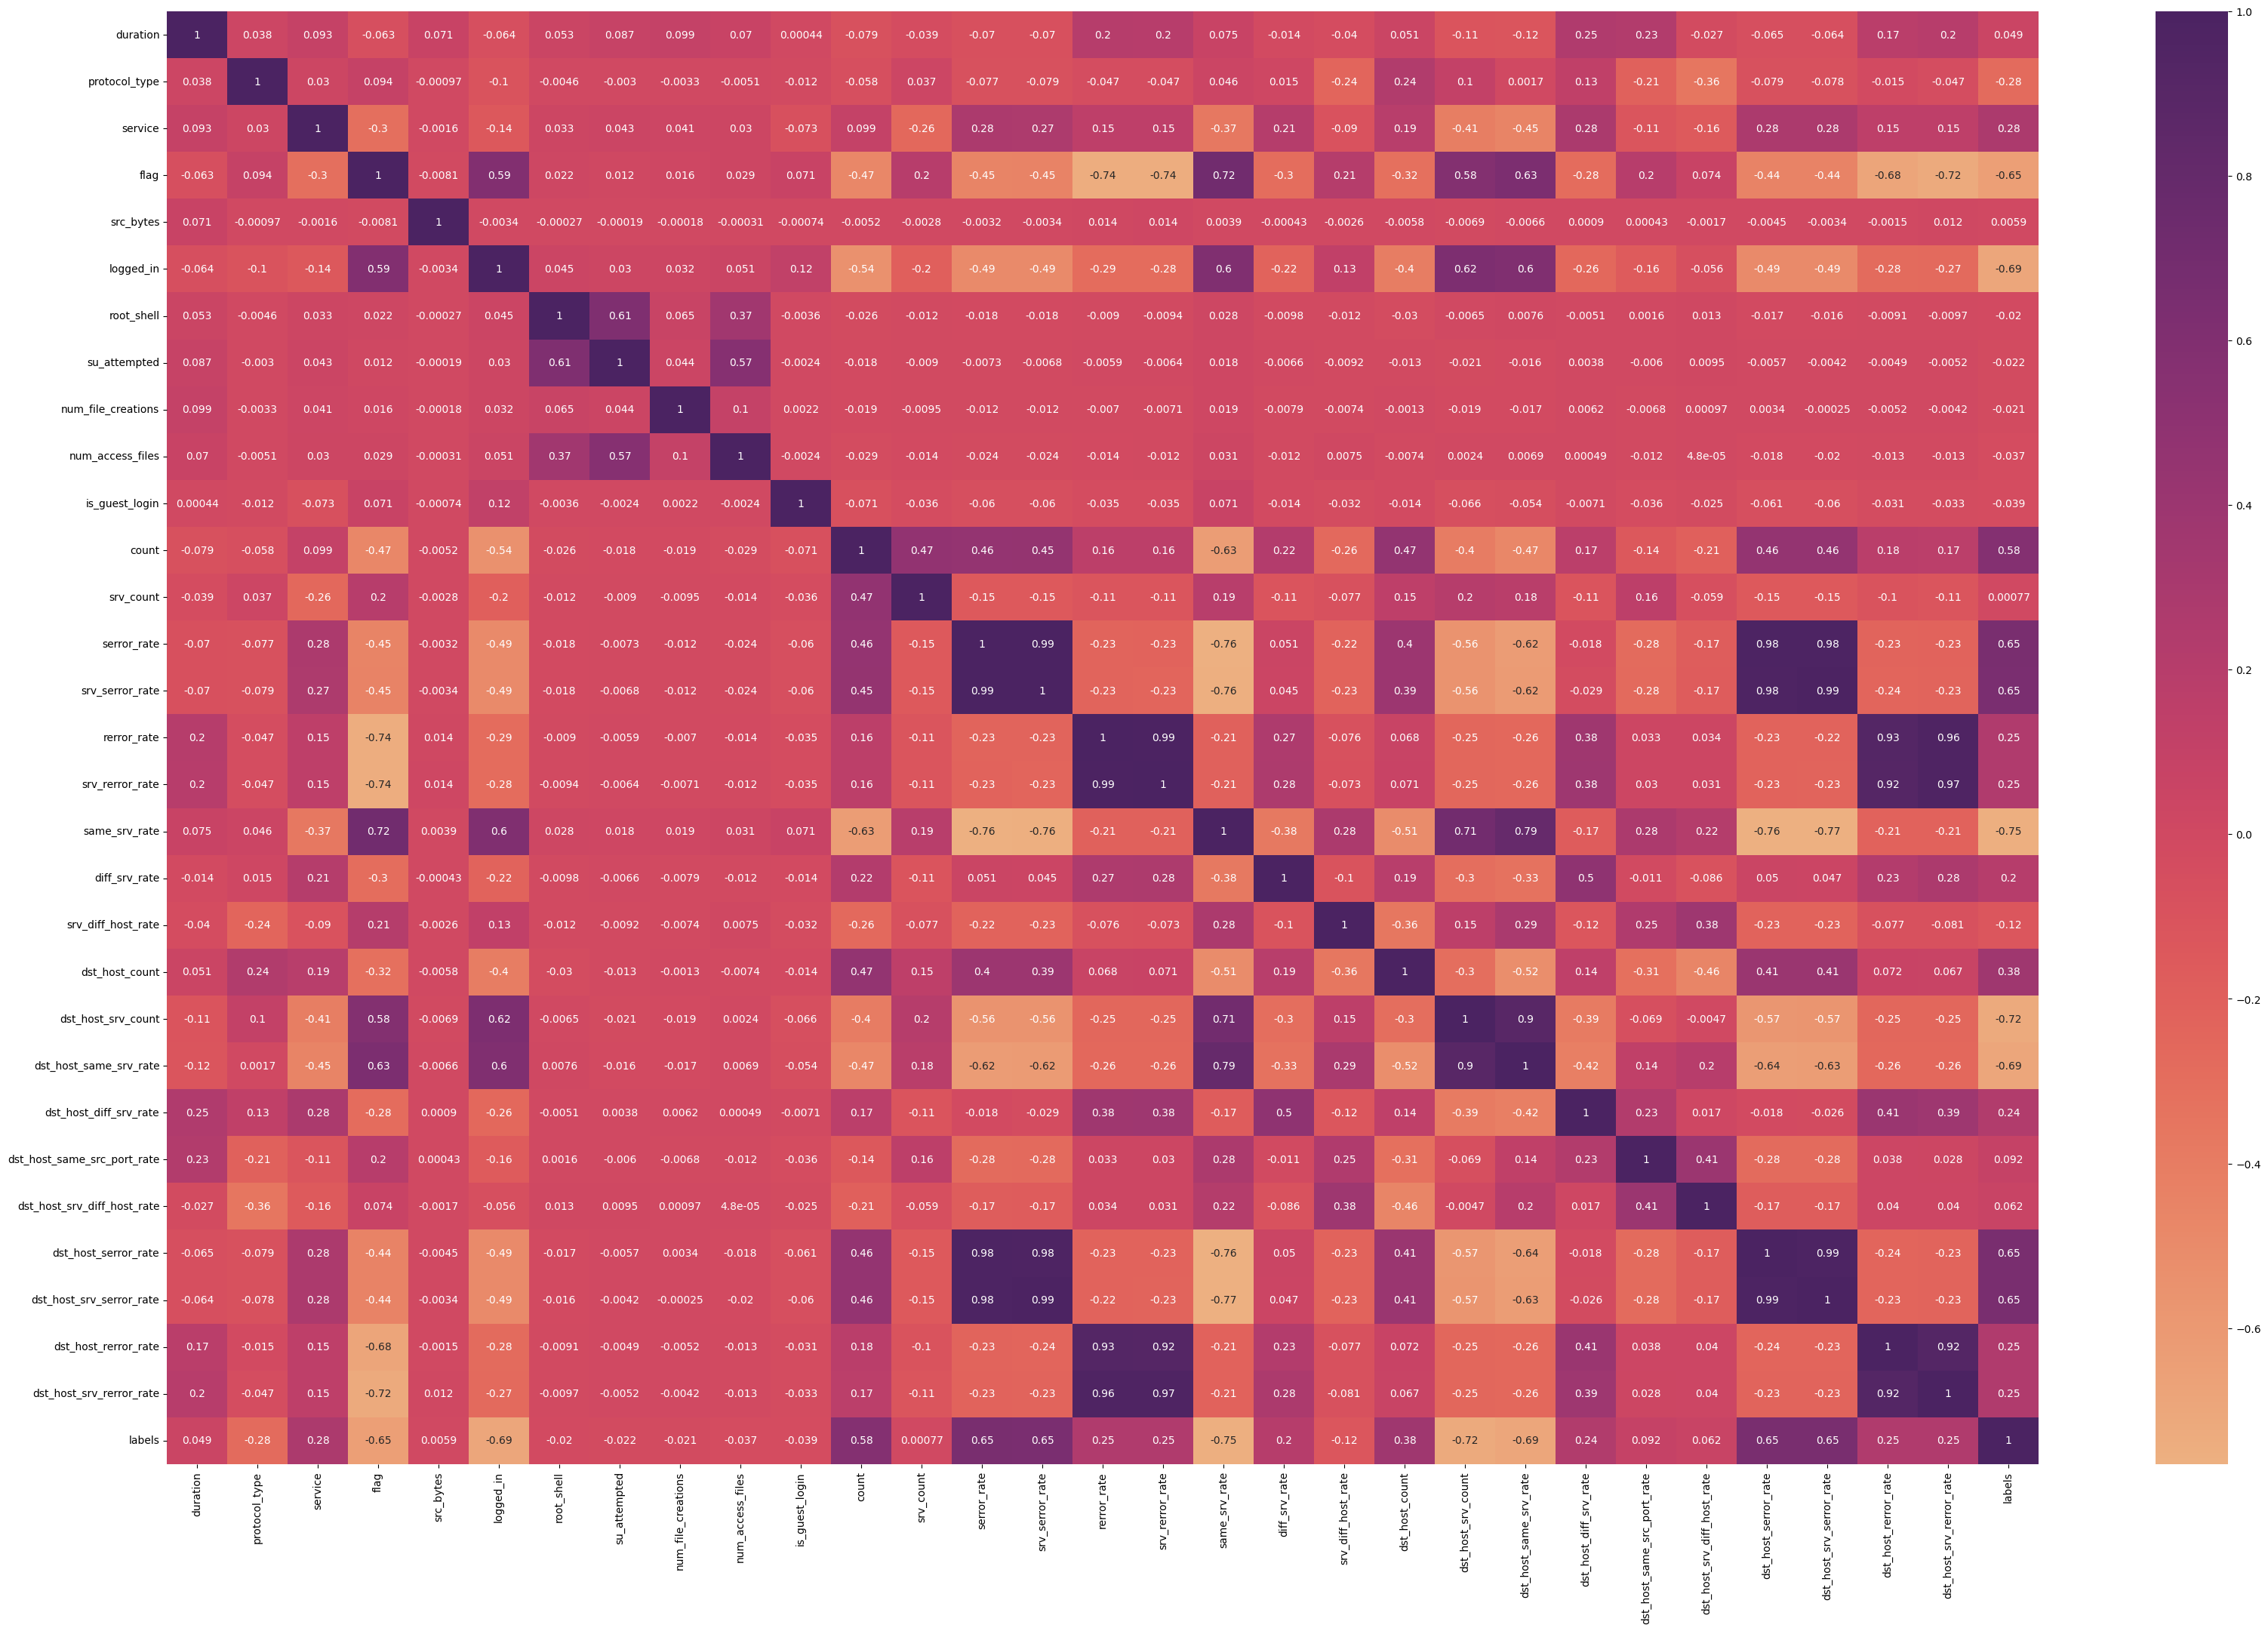

In [ ]:
plt.figure(figsize=(40,25))
sns.heatmap(td_cleaned.corr(),annot= True,cmap = 'flare')
plt.show()

#Scaling Data

In [ ]:
X_trn = td_cleaned.drop(['labels'] , axis = 1).values
Y_trn = td_cleaned['labels'].values

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()

X_trn = scaler.fit_transform(X_trn)

In [ ]:
X_trn.shape


(125973, 30)

In [ ]:
from sklearn.model_selection import train_test_split


#BAGI DATA

In [ ]:
x_trn, x_tst, y_trn, y_tst = train_test_split(X_trn, Y_trn, test_size = 0.20)

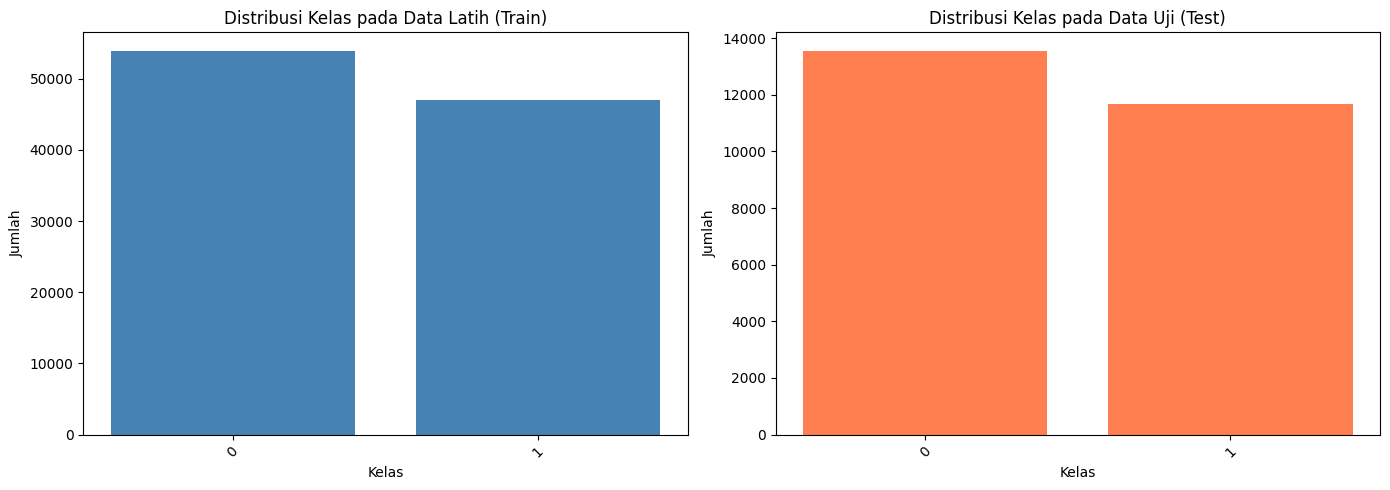

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ubah ke Series
y_trn_series = pd.Series(y_trn)
y_tst_series = pd.Series(y_tst)

# Hitung distribusi label
train_counts = y_trn_series.value_counts().sort_index()
test_counts = y_tst_series.value_counts().sort_index()

# Buat subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Visualisasi distribusi data latih
axes[0].bar(train_counts.index.astype(str), train_counts.values, color='steelblue')
axes[0].set_title('Distribusi Kelas pada Data Latih (Train)')
axes[0].set_xlabel('Kelas')
axes[0].set_ylabel('Jumlah')
axes[0].tick_params(axis='x', rotation=45)

# Visualisasi distribusi data uji
axes[1].bar(test_counts.index.astype(str), test_counts.values, color='coral')
axes[1].set_title('Distribusi Kelas pada Data Uji (Test)')
axes[1].set_xlabel('Kelas')
axes[1].set_ylabel('Jumlah')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
x_trn.shape


(100778, 30)

In [ ]:
x_tst.shape


(25195, 30)

In [ ]:
y_trn.shape


(100778,)

#TRAINING DATA TANPA CV

=== Logistic Regression ===
Training Accuracy: 0.9468237115243406
Testing Accuracy: 0.9466957729708275
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     13480
           1       0.95      0.93      0.94     11715

    accuracy                           0.95     25195
   macro avg       0.95      0.95      0.95     25195
weighted avg       0.95      0.95      0.95     25195



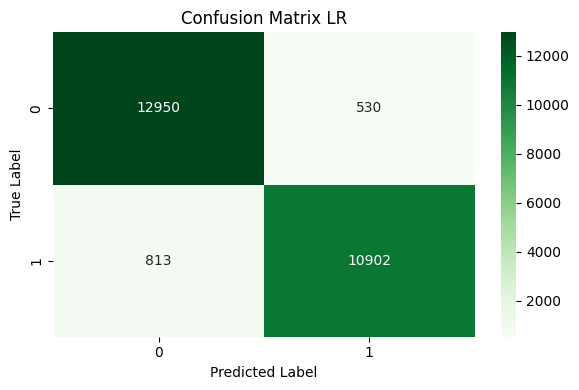

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Melatih model
LR = LogisticRegression()
LR.fit(x_trn, y_trn)

# Prediksi
y_train_predlr = LR.predict(x_trn)
y_test_predlr = LR.predict(x_tst)

# Evaluasi
print("=== Logistic Regression ===")
print("Training Accuracy:", metrics.accuracy_score(y_trn, y_train_predlr))
print("Testing Accuracy:", metrics.accuracy_score(y_tst, y_test_predlr))
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_predlr))

# Confusion Matrix
cmlr = metrics.confusion_matrix(y_tst, y_test_predlr)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmlr, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix LR")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


=== Random Forest ===
Training Accuracy: 0.9999702315981662
Testing Accuracy: 0.9988489779718198
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13480
           1       1.00      1.00      1.00     11715

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



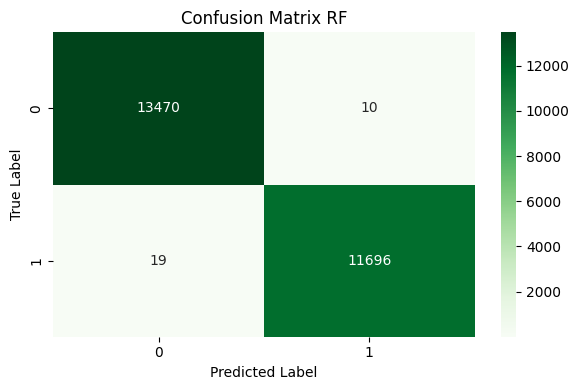

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

RF = RandomForestClassifier()
RF.fit(x_trn, y_trn)

y_train_predrf = RF.predict(x_trn)
y_test_predrf = RF.predict(x_tst)

print("=== Random Forest ===")
print("Training Accuracy:", metrics.accuracy_score(y_trn, y_train_predrf))
print("Testing Accuracy:", metrics.accuracy_score(y_tst, y_test_predrf))
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_predrf))
# Confusion Matrix
cmrf = metrics.confusion_matrix(y_tst, y_test_predrf)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmrf, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix RF")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

=== Support Vector Classifier ===
Training Accuracy: 0.9871896644108833
Testing Accuracy: 0.9869418535423695
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     13480
           1       0.99      0.98      0.99     11715

    accuracy                           0.99     25195
   macro avg       0.99      0.99      0.99     25195
weighted avg       0.99      0.99      0.99     25195



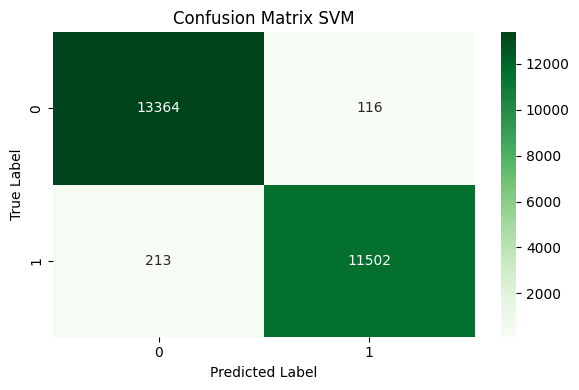

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

SVM = SVC()
SVM.fit(x_trn, y_trn)

y_train_predsv = SVM.predict(x_trn)
y_test_predsv = SVM.predict(x_tst)

print("=== Support Vector Classifier ===")
print("Training Accuracy:", metrics.accuracy_score(y_trn, y_train_predsv))
print("Testing Accuracy:", metrics.accuracy_score(y_tst, y_test_predsv))
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_predsv))
# Confusion Matrix
cmsv = metrics.confusion_matrix(y_tst, y_test_predsv)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmsv, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

=== Naive Bayes ===
Training Accuracy: 0.8883883387247217
Testing Accuracy: 0.8921214526691804
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     13480
           1       0.88      0.89      0.89     11715

    accuracy                           0.89     25195
   macro avg       0.89      0.89      0.89     25195
weighted avg       0.89      0.89      0.89     25195



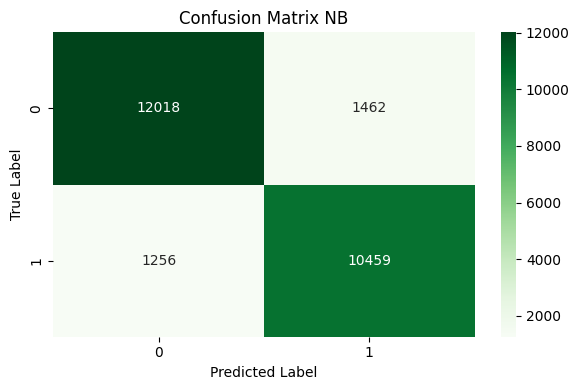

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

NB = GaussianNB()
NB.fit(x_trn, y_trn)

y_train_prednb = NB.predict(x_trn)
y_test_prednb = NB.predict(x_tst)

print("=== Naive Bayes ===")
print("Training Accuracy:", metrics.accuracy_score(y_trn, y_train_prednb))
print("Testing Accuracy:", metrics.accuracy_score(y_tst, y_test_prednb))
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_prednb))

cmnb = metrics.confusion_matrix(y_tst, y_test_prednb)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmnb, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix NB")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

=== K-Nearest Neighbors ===
Training Accuracy: 0.9964079461787295
Testing Accuracy: 0.9941258186148045
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     13480
           1       0.99      0.99      0.99     11715

    accuracy                           0.99     25195
   macro avg       0.99      0.99      0.99     25195
weighted avg       0.99      0.99      0.99     25195



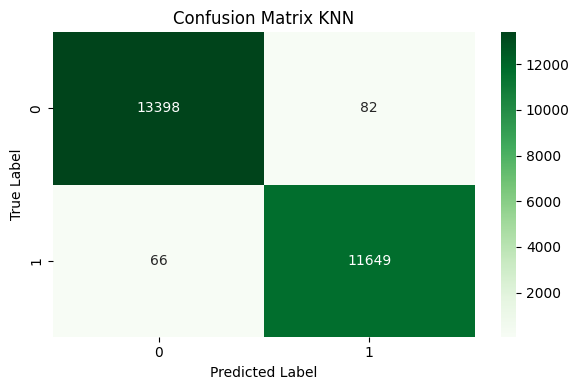

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

KNN = KNeighborsClassifier()
KNN.fit(x_trn, y_trn)

y_train_predkn = KNN.predict(x_trn)
y_test_predkn = KNN.predict(x_tst)

print("=== K-Nearest Neighbors ===")
print("Training Accuracy:", metrics.accuracy_score(y_trn, y_train_predkn))
print("Testing Accuracy:", metrics.accuracy_score(y_tst, y_test_predkn))
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_predkn))
# Confusion Matrix
cmkn = metrics.confusion_matrix(y_tst, y_test_predkn)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmkn, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

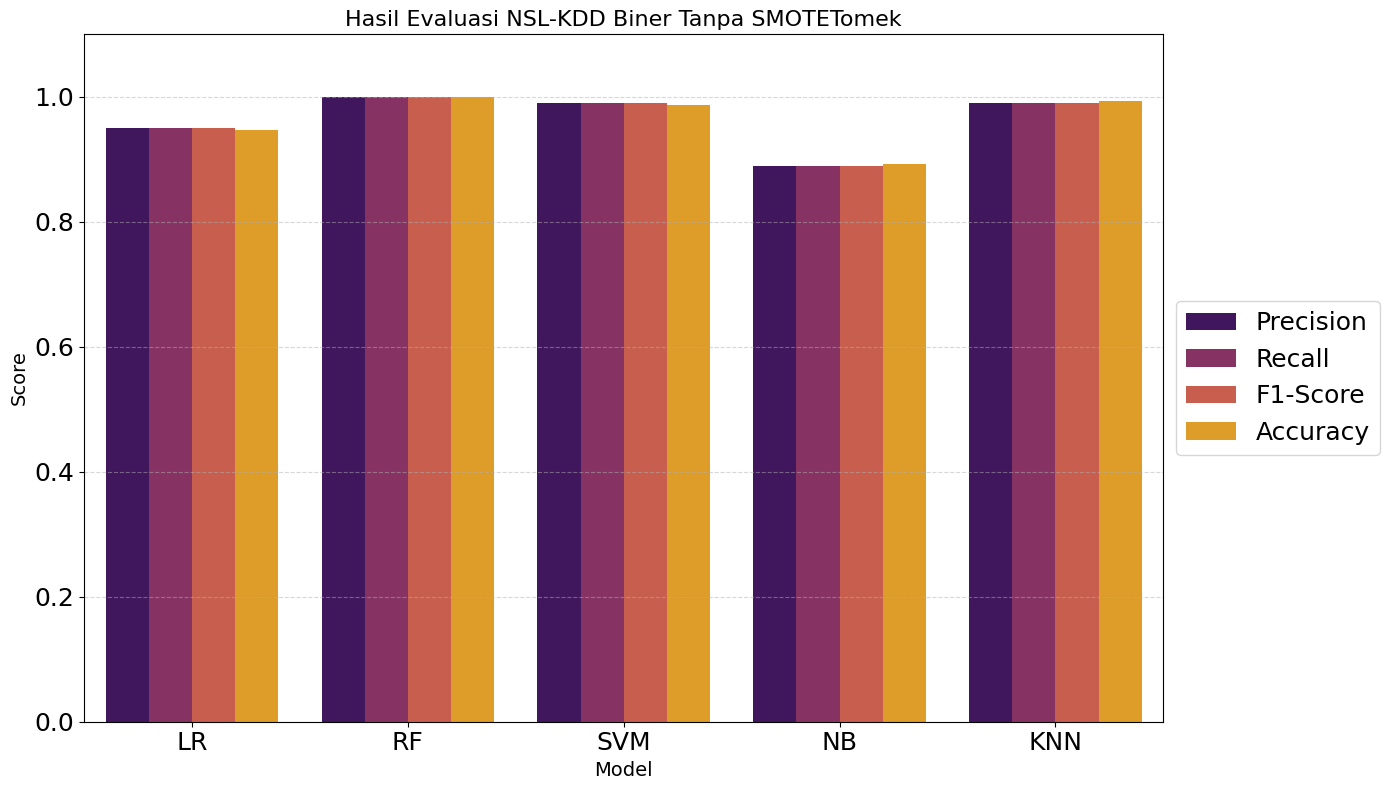

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data macro average dari classification report tanpa GridSearchCV
model_names = ["LR", "RF", "SVM", "NB", "KNN"]
macro_precision = [0.95, 1.00, 0.99, 0.89, 0.99] # Updated values from previous output
macro_recall = [0.95, 1.00, 0.99, 0.89, 0.99]    # Updated values from previous output
macro_f1_score = [0.95, 1.00, 0.99, 0.89, 0.99]  # Updated values from previous output
test_accuracy = [0.947, 0.999, 0.987, 0.892, 0.994] # Updated values from previous output

# Buat DataFrame
df_all_metrics = pd.DataFrame({
    "Model": model_names * 4,
    "Score": macro_precision + macro_recall + macro_f1_score + test_accuracy,
    "Metric": ["Precision"] * len(model_names) + ["Recall"] * len(model_names) + ["F1-Score"] * len(model_names) + ["Accuracy"] * len(model_names)
})

# Buat palet dari colormap 'inferno'
palette = sns.color_palette("inferno", len(df_all_metrics['Metric'].unique()))

# Plot
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=df_all_metrics, x="Model", y="Score", hue="Metric", palette=palette )
plt.title("Hasil Evaluasi NSL-KDD Biner Tanpa SMOTETomek", fontsize=16)
plt.ylim(0, 1.1)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(fontsize=18) # Increase x-axis label font size
plt.yticks(fontsize=18) # Increase y-axis label font size



plt.tight_layout()
plt.show()

#Menggunakan Gridsearch CV

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
Best CV score: 0.9466
Training Accuracy: 0.9468
Testing Accuracy:  0.9471
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     13480
           1       0.95      0.93      0.94     11715

    accuracy                           0.95     25195
   macro avg       0.95      0.95      0.95     25195
weighted avg       0.95      0.95      0.95     25195



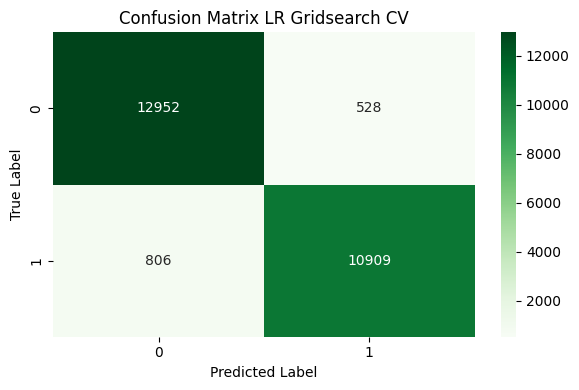

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


lr_model = LogisticRegression(max_iter=1000)
param_gridlr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga']
}

grid_lr = GridSearchCV(lr_model, param_gridlr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(x_trn, y_trn)

print("Best parameters:", grid_lr.best_params_)
print(f"Best CV score: {grid_lr.best_score_:.4f}")

# Evaluasi pada data training & testing
best_lr = grid_lr.best_estimator_
y_train_predlrm = best_lr.predict(x_trn)
y_test_predlrm = best_lr.predict(x_tst)

print(f"Training Accuracy: {metrics.accuracy_score(y_trn, y_train_predlrm):.4f}")
print(f"Testing Accuracy:  {metrics.accuracy_score(y_tst, y_test_predlrm):.4f}")
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_predlrm))
# Confusion Matrix
cmlrm = metrics.confusion_matrix(y_tst, y_test_predlrm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmlrm, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix LR Gridsearch CV")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


🔍 GridSearchCV for Random Forest...
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV score: 0.9988
=== Random Forest ===
Training Accuracy: 1.0000
Testing Accuracy:  0.9988
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13480
           1       1.00      1.00      1.00     11715

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



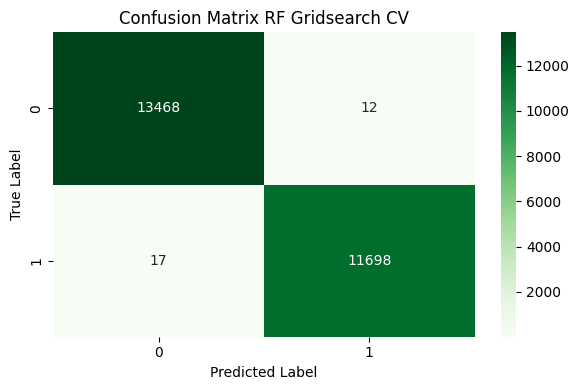

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

print("\n🔍 GridSearchCV for Random Forest...")

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
param_gridrfm = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]

}

grid_rf = GridSearchCV(rf_model, param_gridrfm, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(x_trn, y_trn)

print("Best parameters:", grid_rf.best_params_)
print(f"Best CV score: {grid_rf.best_score_:.4f}")

# Evaluasi pada data training & testing
best_rf = grid_rf.best_estimator_
y_train_predrfm = best_rf.predict(x_trn)
y_test_predrfm = best_rf.predict(x_tst)

print("=== Random Forest ===")
print(f"Training Accuracy: {metrics.accuracy_score(y_trn, y_train_predrfm):.4f}")
print(f"Testing Accuracy:  {metrics.accuracy_score(y_tst, y_test_predrfm):.4f}")
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_predrfm))
# Confusion Matrix
cmrfm = metrics.confusion_matrix(y_tst, y_test_predrfm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmrfm, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix RF Gridsearch CV")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


🔍 GridSearchCV for Support Vector Machine...


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
Best CV score: 0.9485
Training Accuracy: 0.9487
Testing Accuracy:  0.9494
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     13480
           1       0.96      0.93      0.94     11715

    accuracy                           0.95     25195
   macro avg       0.95      0.95      0.95     25195
weighted avg       0.95      0.95      0.95     25195



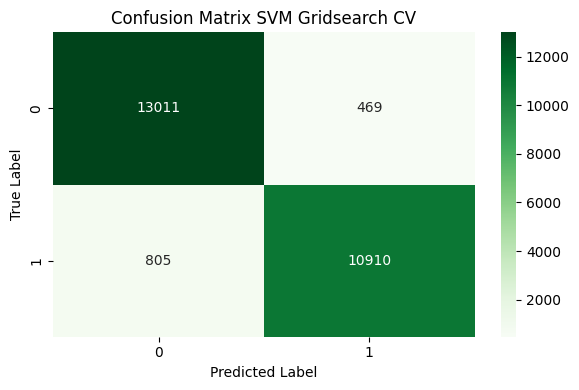

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

print("\n🔍 GridSearchCV for Support Vector Machine...")

svm_model = SVC()
param_gridsvm = {
    'C': [0.1, 0.5, 1],
    'kernel': ['linear'],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced']
}

grid_svm = GridSearchCV(svm_model, param_gridsvm, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(x_trn, y_trn)

print("Best parameters:", grid_svm.best_params_)
print(f"Best CV score: {grid_svm.best_score_:.4f}")

# Evaluasi pada data training & testing
best_svm = grid_svm.best_estimator_
y_train_predsvm = best_svm.predict(x_trn)
y_test_predsvm = best_svm.predict(x_tst)


print(f"Training Accuracy: {metrics.accuracy_score(y_trn, y_train_predsvm):.4f}")
print(f"Testing Accuracy:  {metrics.accuracy_score(y_tst, y_test_predsvm):.4f}")
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_predsvm))
# Confusion Matrix
cmsvm = metrics.confusion_matrix(y_tst, y_test_predsvm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmsvm, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix SVM Gridsearch CV")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


🔍 GridSearchCV for Naive Bayes...
Best parameters: {'var_smoothing': 1e-06}
Best CV score: 0.8856
Training Accuracy: 0.8846
Testing Accuracy:  0.8865
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89     13527
           1       0.88      0.88      0.88     11668

    accuracy                           0.89     25195
   macro avg       0.89      0.89      0.89     25195
weighted avg       0.89      0.89      0.89     25195



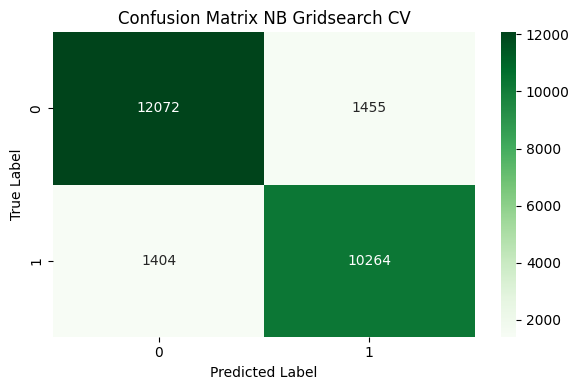

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
print("\n🔍 GridSearchCV for Naive Bayes...")

nb_model = GaussianNB()
param_gridnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-7]
}

grid_nb = GridSearchCV(nb_model, param_gridnb, cv=5, scoring='accuracy', n_jobs=-1)
grid_nb.fit(x_trn, y_trn)

print("Best parameters:", grid_nb.best_params_)
print(f"Best CV score: {grid_nb.best_score_:.4f}")

# Evaluasi pada data training & testing
best_nb = grid_nb.best_estimator_
y_train_prednb = best_nb.predict(x_trn)
y_test_prednb = best_nb.predict(x_tst)

print(f"Training Accuracy: {metrics.accuracy_score(y_trn, y_train_prednb):.4f}")
print(f"Testing Accuracy:  {metrics.accuracy_score(y_tst, y_test_prednb):.4f}")
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_prednb))
# Confusion Matrix
cmnb = metrics.confusion_matrix(y_tst, y_test_prednb)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmnb, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix NB Gridsearch CV")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()



🔍 GridSearchCV for K-Nearest Neighbors...
Best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best CV score: 0.9957
Training Accuracy: 0.9999
Testing Accuracy:  0.9962
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13527
           1       1.00      1.00      1.00     11668

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



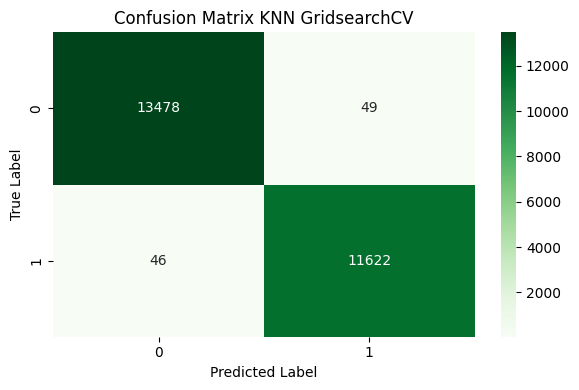

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

print("\n🔍 GridSearchCV for K-Nearest Neighbors...")

knn_model = KNeighborsClassifier()
param_gridknn = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(knn_model, param_gridknn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(x_trn, y_trn)

print("Best parameters:", grid_knn.best_params_)
print(f"Best CV score: {grid_knn.best_score_:.4f}")

# Evaluasi pada data training & testing
best_knn = grid_knn.best_estimator_
y_train_predknn = best_knn.predict(x_trn)
y_test_predknn = best_knn.predict(x_tst)

print(f"Training Accuracy: {metrics.accuracy_score(y_trn, y_train_predknn):.4f}")
print(f"Testing Accuracy:  {metrics.accuracy_score(y_tst, y_test_predknn):.4f}")
print("Classification Report:\n", metrics.classification_report(y_tst, y_test_predknn))
# Confusion Matrix
cmknn = metrics.confusion_matrix(y_tst, y_test_predknn)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cmknn, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix KNN GridsearchCV")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

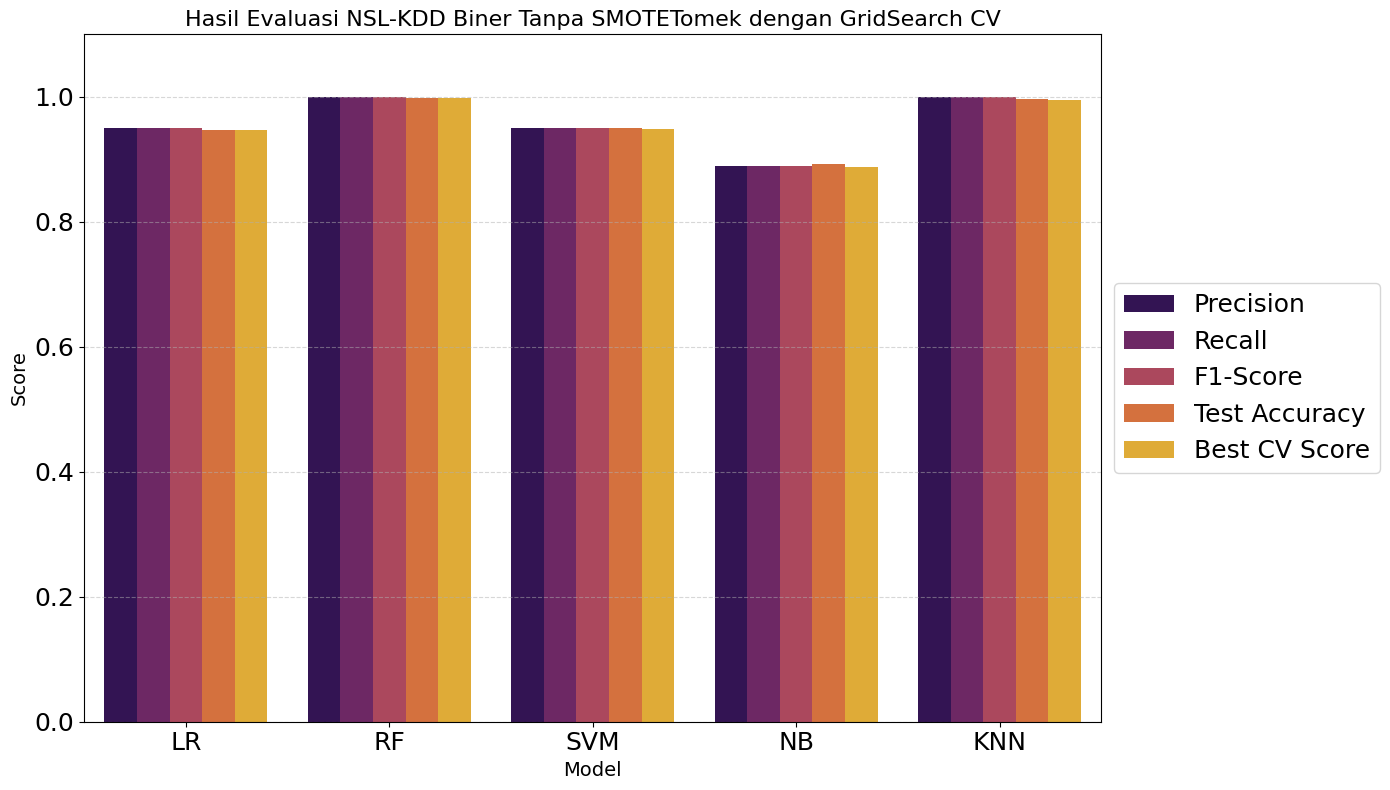

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics

# Data dari hasil GridSearchCV (extracted manually from previous outputs)
model_names = ["LR", "RF", "SVM", "NB", "KNN"]

# Macro averages from Classification Reports (Testing Data after GridSearchCV)
macro_precision = [0.95, 1.00, 0.95, 0.89, 1.00] # Extracted from LR, RF, SVM, NB, KNN classification reports on test data
macro_recall = [0.95, 1.00, 0.95, 0.89, 1.00]    # Extracted from LR, RF, SVM, NB, KNN classification reports on test data
macro_f1_score = [0.95, 1.00, 0.95, 0.89, 1.00]  # Extracted from LR, RF, SVM, NB, KNN classification reports on test data

# Test accuracies from GridSearchCV outputs
test_accuracies = [0.9471, 0.9988, 0.9494, 0.8921, 0.9967] # Extracted from "Testing Accuracy" in GridSearchCV outputs

# Best CV scores from GridSearchCV outputs
best_cv_scores = [0.9466, 0.9988, 0.9485, 0.8874, 0.9957] # Extracted from "Best CV score" in GridSearchCV outputs


# Buat DataFrame
df_all_metrics = pd.DataFrame({
    "Model": model_names * 5,
    "Score": macro_precision + macro_recall + macro_f1_score + test_accuracies + best_cv_scores,
    "Metric": ["Precision"] * len(model_names) + ["Recall"] * len(model_names) + ["F1-Score"] * len(model_names) + ["Test Accuracy"] * len(model_names) + ["Best CV Score"] * len(model_names)
})

# Buat palet dari colormap 'inferno'
palette = sns.color_palette("inferno", len(df_all_metrics['Metric'].unique()))

# Plot
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=df_all_metrics, x="Model", y="Score", hue="Metric", palette=palette )
plt.title("Hasil Evaluasi NSL-KDD Biner Tanpa SMOTETomek dengan GridSearch CV", fontsize=16)
plt.ylim(0, 1.1)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(fontsize=18) # Increase x-axis label font size
plt.yticks(fontsize=18) # Increase y-axis label font size



plt.tight_layout()
plt.show()

#Ekspor Impor Model


In [ ]:
# Ambil model terbaik dan prediksi
best_svm = grid_svm.best_estimator_
y_test_pred = best_svm.predict(x_tst)

In [ ]:
best_lr = grid_lr.best_estimator_
y_test_pred = best_lr.predict(x_tst)

In [ ]:
best_rf = grid_rf.best_estimator_
y_test_pred = best_rf.predict(x_tst)

In [ ]:
best_nb = grid_nb.best_estimator_
y_test_pred = best_nb.predict(x_tst)

In [ ]:
best_knn = grid_knn.best_estimator_
y_test_pred = best_knn.predict(x_tst)

In [ ]:
import joblib
joblib.dump(best_svm, "SVM NSL BNS.pkl")
joblib.dump(scaler, 'scaler NSL BNS.pkl')
joblib.dump(best_lr, "LR NSL BNS.pkl"  )
joblib.dump(best_rf, "RF NSL BNS.pkl"  )
joblib.dump(best_nb, "NB NSL BNS.pkl"  )
joblib.dump(best_knn, "KNN NSL BNS.pkl"  )

['KNN NSL BNS.pkl']

In [ ]:
import os
print(os.listdir())

['.config', 'RF_CV.pkl', 'scaler.pkl', 'SVM_CV.pkl', 'drive', 'NB_CV.pkl', 'KNN_CV.pkl', 'LR_CV.pkl', 'sample_data']


In [ ]:
import joblib

model_svm = joblib.load("SVM NSL BNS.pkl")
scaler = joblib.load('scaler NSL BNS.pkl')
model_lr = joblib.load("LR NSL BNS.pkl")
model_rf = joblib.load("RF NSL BNS.pkl")
model_nb = joblib.load("NB NSL BNS.pkl")
model_knn = joblib.load("KNN NSL BNS.pkl")

#Load data Kdd_Test

In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/Dataset/kdd_test.csv")

#Bersihin Data

In [ ]:
test_data['labels'] = test_data['labels'].replace({
    'normal': 0,
    'neptune': 1, 'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,
    'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
    'ipsweep': 1, 'nmap': 1, 'portsweep': 1, 'satan': 1, 'mscan': 1, 'saint': 1,
    'ftp_write': 1, 'guess_passwd': 1, 'imap': 1, 'multihop': 1, 'phf': 1, 'spy': 1,
    'warezclient': 1, 'warezmaster': 1, 'sendmail': 1, 'named': 1, 'snmpgetattack': 1,
    'snmpguess': 1, 'xlock': 1, 'xsnoop': 1, 'httptunnel': 1,
    'buffer_overflow': 1, 'loadmodule': 1, 'perl': 1, 'rootkit': 1, 'ps': 1,
    'sqlattack': 1, 'xterm': 1
})

test_data['labels'] = test_data['labels'].astype(int)


In [ ]:
b = len(test_data.select_dtypes(include=["number"]).columns)
b

39

In [ ]:
colst = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate']

In [ ]:
for col in train_data.select_dtypes(include=["object"]):
    print(col)

In [ ]:
from sklearn.preprocessing import LabelEncoder

colst = ['protocol_type','service','flag']

for i in colst:
    en = LabelEncoder()

    test_data[i] = en.fit_transform(test_data[i])

In [ ]:
print("Kolom yang tersedia dalam dataset:")
print(test_data.columns.tolist())

columns_to_drops = [
    'num_outbound_cmds',  # Kolom dengan nilai NaN
    'is_host_login',      # Korelasi sangat rendah
    'land',               # Korelasi sangat rendah
    'urgent',             # Korelasi sangat rendah
    'wrong_fragment',     # Korelasi rendah
    'num_failed_logins',  # Korelasi rendah
    'num_compromised',    # Korelasi rendah
    'num_root',           # Korelasi rendah
    'num_shells',         # Korelasi rendah
    'dst_bytes',          # Korelasi rendah
    'hot'                 # Korelasi rendah
]

ts_cleaned = test_data.drop(columns=columns_to_drops, errors='ignore')

print("\nKolom setelah dihapus:")
print(ts_cleaned.columns.tolist())

Kolom yang tersedia dalam dataset:
['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'labels']

Kolom setelah dihapus:
['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'logged_in', 'root_shell', 'su_attempted', 'num_file_creations', 'num_access_files', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 

In [ ]:
Xs_trn = ts_cleaned.drop(['labels'] , axis = 1).values


In [ ]:
print(Xs_trn.shape)
print(ts_cleaned.shape)


(22544, 30)
(22544, 31)


In [ ]:
ts_cleaned.head()

,duration,protocol_type,service,flag,src_bytes,logged_in,root_shell,su_attempted,num_file_creations,num_access_files,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,5,1,51,9,2429,1,0,0,0,0,...,57,0.11,0.02,0.01,0.04,0.0,0.0,0.87,0.0,0
1,0,2,12,9,45,0,0,0,0,0,...,155,0.80,0.02,0.01,0.00,0.0,0.0,0.00,0.0,0
2,0,2,12,9,45,0,0,0,0,0,...,255,1.00,0.00,0.01,0.00,0.0,0.0,0.00,0.0,0
3,1979,2,41,9,145,0,0,0,0,0,...,2,0.01,0.84,1.00,0.00,0.0,0.0,0.00,0.0,0
4,14462,1,41,4,1,0,0,0,0,0,...,2,0.01,0.68,1.00,0.00,0.0,0.0,1.00,1.0,1


#Test Model Pada Data Baru



In [ ]:
from sklearn.preprocessing import StandardScaler


X_train_scaled = scaler.fit_transform(x_trn)
X_test_scaled = scaler.transform(Xs_trn)                # data test

# Kalau pakai label juga:
y_train = y_trn


=== Logistic Regression (Best Model) ===
              precision    recall  f1-score   support

           0       0.84      0.70      0.76     11245
           1       0.74      0.87      0.80     11299

    accuracy                           0.78     22544
   macro avg       0.79      0.78      0.78     22544
weighted avg       0.79      0.78      0.78     22544



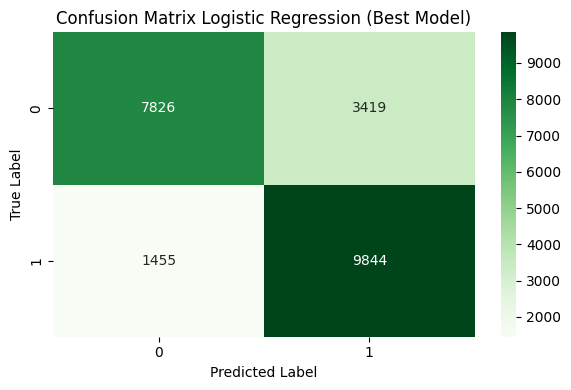

In [ ]:
# Asumsi model_lr dan scaler sudah dimuat di sel sebelumnya (k1N2mFa76wyz)
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Pisahkan fitur dan label (ini sudah benar)
X_train = td_cleaned.drop(columns=['labels'])
y_train = td_cleaned['labels']

X_test = ts_cleaned.drop(columns=['labels'])
y_test = ts_cleaned['labels']

# Pastikan kolomnya konsisten (ini sudah benar)
X_test = X_test[X_train.columns]

# Konversi X_test menjadi NumPy array sebelum diskalakan
X_test_array = X_test.values

# Gunakan scaler yang sudah dimuat untuk mentransformasi data test
X_test_scaled = scaler.transform(X_test_array)

# Gunakan model Logistic Regression terbaik yang sudah dimuat untuk prediksi
y_pred_lr = model_lr.predict(X_test_scaled)

# Evaluasi
print("=== Logistic Regression (Best Model) ===")
print(classification_report(y_test, y_pred_lr))

# Visualisasi Confusion Matrix
cmlr_loaded = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cmlr_loaded, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix Logistic Regression (Best Model)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

=== Random Forest (Best Model) ===
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     11245
           1       0.00      0.00      0.00     11299

    accuracy                           0.50     22544
   macro avg       0.25      0.50      0.33     22544
weighted avg       0.25      0.50      0.33     22544



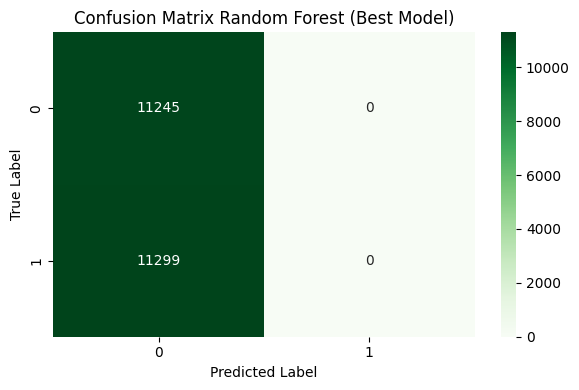

In [ ]:
# Asumsi model_lr dan scaler sudah dimuat di sel sebelumnya (k1N2mFa76wyz)
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Pisahkan fitur dan label (ini sudah benar)
X_train = td_cleaned.drop(columns=['labels'])
y_train = td_cleaned['labels']

X_test = ts_cleaned.drop(columns=['labels'])
y_test = ts_cleaned['labels']

# Pastikan kolomnya konsisten (ini sudah benar)
X_test = X_test[X_train.columns]

# Konversi X_test menjadi NumPy array sebelum diskalakan
X_test_array = X_test.values

# Gunakan scaler yang sudah dimuat untuk mentransformasi data test
X_test_scaled = scaler.transform(X_test_array)

# Gunakan model Logistic Regression terbaik yang sudah dimuat untuk prediksi
y_pred_rf = model_rf.predict(X_test_scaled)

# Evaluasi
print("=== Random Forest (Best Model) ===")
print(classification_report(y_test, y_pred_rf))

# Visualisasi Confusion Matrix
cmlr_loaded = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cmlr_loaded, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix Random Forest (Best Model)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

=== Support Vectore Machine (Best Model) ===
              precision    recall  f1-score   support

           0       0.75      0.26      0.38     11245
           1       0.55      0.92      0.69     11299

    accuracy                           0.59     22544
   macro avg       0.65      0.59      0.54     22544
weighted avg       0.65      0.59      0.54     22544



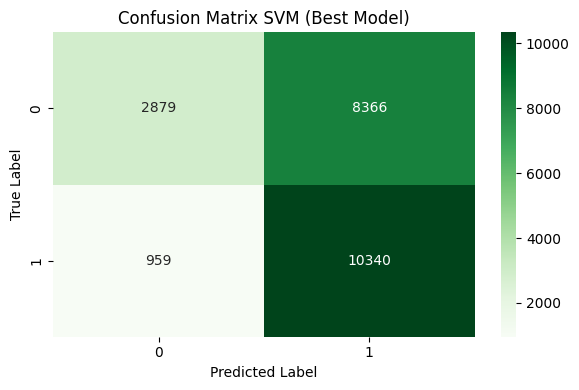

In [ ]:
# Asumsi model_lr dan scaler sudah dimuat di sel sebelumnya (k1N2mFa76wyz)
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Pisahkan fitur dan label (ini sudah benar)
X_train = td_cleaned.drop(columns=['labels'])
y_train = td_cleaned['labels']

X_test = ts_cleaned.drop(columns=['labels'])
y_test = ts_cleaned['labels']

# Pastikan kolomnya konsisten (ini sudah benar)
X_test = X_test[X_train.columns]

# Konversi X_test menjadi NumPy array sebelum diskalakan
X_test_array = X_test.values

# Gunakan scaler yang sudah dimuat untuk mentransformasi data test
X_test_scaled = scaler.transform(X_test_array)

# Gunakan model Logistic Regression terbaik yang sudah dimuat untuk prediksi
y_pred_svm = model_svm.predict(X_test_scaled)

# Evaluasi
print("=== Support Vectore Machine (Best Model) ===")
print(classification_report(y_test, y_pred_svm))

# Visualisasi Confusion Matrix
cmlr_loaded = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cmlr_loaded, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix SVM (Best Model)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

=== Naive Bayes (Best Model) ===
              precision    recall  f1-score   support

           0       0.19      0.05      0.08     11245
           1       0.46      0.79      0.58     11299

    accuracy                           0.42     22544
   macro avg       0.33      0.42      0.33     22544
weighted avg       0.33      0.42      0.33     22544



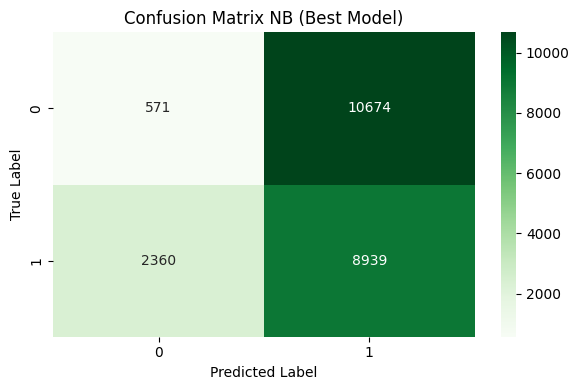

In [ ]:
# Asumsi model_lr dan scaler sudah dimuat di sel sebelumnya (k1N2mFa76wyz)
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Pisahkan fitur dan label (ini sudah benar)
X_train = td_cleaned.drop(columns=['labels'])
y_train = td_cleaned['labels']

X_test = ts_cleaned.drop(columns=['labels'])
y_test = ts_cleaned['labels']

# Pastikan kolomnya konsisten (ini sudah benar)
X_test = X_test[X_train.columns]

# Konversi X_test menjadi NumPy array sebelum diskalakan
X_test_array = X_test.values

# Gunakan scaler yang sudah dimuat untuk mentransformasi data test
X_test_scaled = scaler.transform(X_test_array)

# Gunakan model Logistic Regression terbaik yang sudah dimuat untuk prediksi
y_pred_nb = model_nb.predict(X_test_scaled)

# Evaluasi
print("=== Naive Bayes (Best Model) ===")
print(classification_report(y_test, y_pred_nb))

# Visualisasi Confusion Matrix
cmlr_loaded = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(cmlr_loaded, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix NB (Best Model)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

=== KNN (Best Model) ===
              precision    recall  f1-score   support

           0       0.24      0.20      0.22     11245
           1       0.31      0.36      0.33     11299

    accuracy                           0.28     22544
   macro avg       0.28      0.28      0.28     22544
weighted avg       0.28      0.28      0.28     22544



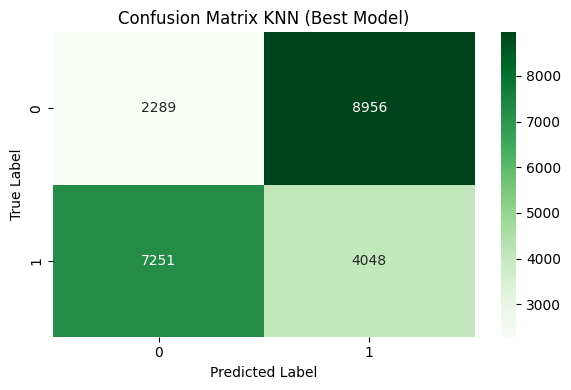

In [ ]:
# Asumsi model_lr dan scaler sudah dimuat di sel sebelumnya (k1N2mFa76wyz)
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Pisahkan fitur dan label (ini sudah benar)
X_train = td_cleaned.drop(columns=['labels'])
y_train = td_cleaned['labels']

X_test = ts_cleaned.drop(columns=['labels'])
y_test = ts_cleaned['labels']

# Pastikan kolomnya konsisten (ini sudah benar)
X_test = X_test[X_train.columns]

# Konversi X_test menjadi NumPy array sebelum diskalakan
X_test_array = X_test.values

# Gunakan scaler yang sudah dimuat untuk mentransformasi data test
X_test_scaled = scaler.transform(X_test_array)

# Gunakan model Logistic Regression terbaik yang sudah dimuat untuk prediksi
y_pred_knn = model_knn.predict(X_test_scaled)

# Evaluasi
print("=== KNN (Best Model) ===")
print(classification_report(y_test, y_pred_knn))

# Visualisasi Confusion Matrix
cmlr_loaded = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cmlr_loaded, annot=True, fmt='d', cmap='Greens', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix KNN (Best Model)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

def predict_realtime_lr():
    input_dict = {}

    # Daftar kolom dan tipe data (sesuai dengan kolom yang digunakan model)
    columns = {
        'duration': int,
        'protocol_type': int,
        'service': int,
        'flag': int,
        'src_bytes': int,
        'logged_in': int,
        'root_shell': int,
        'su_attempted': int,
        'num_file_creations': int,
        'num_access_files': int,
        'is_guest_login': int,
        'count': int,
        'srv_count': int,
        'serror_rate': float,
        'srv_serror_rate': float,
        'rerror_rate': float,
        'srv_rerror_rate': float,
        'same_srv_rate': float,
        'diff_srv_rate': float,
        'srv_diff_host_rate': float,
        'dst_host_count': int,
        'dst_host_srv_count': int,
        'dst_host_same_srv_rate': float,
        'dst_host_diff_srv_rate': float,
        'dst_host_same_src_port_rate': float,
        'dst_host_srv_diff_host_rate': float,
        'dst_host_serror_rate': float,
        'dst_host_srv_serror_rate': float,
        'dst_host_rerror_rate': float,
        'dst_host_srv_rerror_rate': float
    }

    # Minta input satu per satu
    for col, dtype in columns.items():
        value = input(f"Masukkan nilai untuk '{col}': ")
        try:
            input_dict[col] = [dtype(value)]
        except ValueError:
            print(f"❌ Format salah untuk kolom '{col}', gunakan tipe {dtype.__name__}")
            return

    input_df = pd.DataFrame(input_dict)

    # Penting: Konversi ke NumPy array dan Skalakan data input menggunakan scaler yang sudah dilatih
    input_scaled = scaler.transform(input_df.values)

    # Prediksi menggunakan model_lr yang sudah dimuat
    prediction = model_lr.predict(input_scaled)

    if prediction[0] == 0:
        print("✅ Prediksi: NORMAL")
    else:
        print("🚨 Prediksi: SERANGAN")

# Panggil fungsi untuk memulai prediksi
predict_realtime_lr()

Masukkan nilai untuk 'duration': 2
Masukkan nilai untuk 'protocol_type': 2
Masukkan nilai untuk 'service': 2
Masukkan nilai untuk 'flag': 2
Masukkan nilai untuk 'src_bytes': 2
Masukkan nilai untuk 'logged_in': 2
Masukkan nilai untuk 'root_shell': 2
Masukkan nilai untuk 'su_attempted': 2
Masukkan nilai untuk 'num_file_creations': 2
Masukkan nilai untuk 'num_access_files': 2
Masukkan nilai untuk 'is_guest_login': 2
Masukkan nilai untuk 'count': 2
Masukkan nilai untuk 'srv_count': 2
Masukkan nilai untuk 'serror_rate': 2
Masukkan nilai untuk 'srv_serror_rate': 2
Masukkan nilai untuk 'rerror_rate': 2
Masukkan nilai untuk 'srv_rerror_rate': 2
Masukkan nilai untuk 'same_srv_rate': 2
Masukkan nilai untuk 'diff_srv_rate': 2
Masukkan nilai untuk 'srv_diff_host_rate': 2
Masukkan nilai untuk 'dst_host_count': 2
Masukkan nilai untuk 'dst_host_srv_count': 2
Masukkan nilai untuk 'dst_host_same_srv_rate': 2
Masukkan nilai untuk 'dst_host_diff_srv_rate': 2
Masukkan nilai untuk 'dst_host_same_src_port_r

In [ ]:
import pandas as pd

def predict_realtime_rf():
    input_dict = {}

    # Daftar kolom dan tipe data
    columns = {
        'duration': int,
        'protocol_type': int,
        'service': int,
        'flag': int,
        'src_bytes': int,
        'logged_in': int,
        'root_shell': int,
        'su_attempted': int,
        'num_file_creations': int,
        'num_access_files': int,
        'is_guest_login': int,
        'count': int,
        'srv_count': int,
        'serror_rate': float,
        'srv_serror_rate': float,
        'rerror_rate': float,
        'srv_rerror_rate': float,
        'same_srv_rate': float,
        'diff_srv_rate': float,
        'srv_diff_host_rate': float,
        'dst_host_count': int,
        'dst_host_srv_count': int,
        'dst_host_same_srv_rate': float,
        'dst_host_diff_srv_rate': float,
        'dst_host_same_src_port_rate': float,
        'dst_host_srv_diff_host_rate': float,
        'dst_host_serror_rate': float,
        'dst_host_srv_serror_rate': float,
        'dst_host_rerror_rate': float,
        'dst_host_srv_rerror_rate': float
    }

    # Minta input satu per satu
    for col, dtype in columns.items():
        value = input(f"Masukkan nilai untuk '{col}': ")
        try:
            input_dict[col] = [dtype(value)]
        except ValueError:
            print(f"❌ Format salah untuk kolom '{col}', gunakan tipe {dtype.__name__}")
            return

    input_df = pd.DataFrame(input_dict)

    # Penting: Konversi ke NumPy array dan Skalakan data input menggunakan scaler yang sudah dilatih
    input_scaled = scaler.transform(input_df.values)

    # Prediksi menggunakan model_lr yang sudah dimuat
    prediction = model_rf.predict(input_scaled)

    if prediction[0] == 0:
        print("✅ Prediksi: NORMAL")
    else:
        print("🚨 Prediksi: SERANGAN")

# Panggil fungsi untuk memulai prediksi
predict_realtime_rf()

Masukkan nilai untuk 'duration': 2
Masukkan nilai untuk 'protocol_type': 2
Masukkan nilai untuk 'service': 2
Masukkan nilai untuk 'flag': 2
Masukkan nilai untuk 'src_bytes': 2
Masukkan nilai untuk 'logged_in': 2
Masukkan nilai untuk 'root_shell': 2
Masukkan nilai untuk 'su_attempted': 2
Masukkan nilai untuk 'num_file_creations': 2
Masukkan nilai untuk 'num_access_files': 2
Masukkan nilai untuk 'is_guest_login': 2
Masukkan nilai untuk 'count': 2
Masukkan nilai untuk 'srv_count': 2
Masukkan nilai untuk 'serror_rate': 2
Masukkan nilai untuk 'srv_serror_rate': 2
Masukkan nilai untuk 'rerror_rate': 2
Masukkan nilai untuk 'srv_rerror_rate': 2
Masukkan nilai untuk 'same_srv_rate': 2
Masukkan nilai untuk 'diff_srv_rate': 2
Masukkan nilai untuk 'srv_diff_host_rate': 2
Masukkan nilai untuk 'dst_host_count': 2
Masukkan nilai untuk 'dst_host_srv_count': 2
Masukkan nilai untuk 'dst_host_same_srv_rate': 2
Masukkan nilai untuk 'dst_host_diff_srv_rate': 2
Masukkan nilai untuk 'dst_host_same_src_port_r

In [ ]:
import pandas as pd

def predict_realtime_svm():
    input_dict = {}

    # Daftar kolom dan tipe data
    columns = {
        'duration': int,
        'protocol_type': int,
        'service': int,
        'flag': int,
        'src_bytes': int,
        'logged_in': int,
        'root_shell': int,
        'su_attempted': int,
        'num_file_creations': int,
        'num_access_files': int,
        'is_guest_login': int,
        'count': int,
        'srv_count': int,
        'serror_rate': float,
        'srv_serror_rate': float,
        'rerror_rate': float,
        'srv_rerror_rate': float,
        'same_srv_rate': float,
        'diff_srv_rate': float,
        'srv_diff_host_rate': float,
        'dst_host_count': int,
        'dst_host_srv_count': int,
        'dst_host_same_srv_rate': float,
        'dst_host_diff_srv_rate': float,
        'dst_host_same_src_port_rate': float,
        'dst_host_srv_diff_host_rate': float,
        'dst_host_serror_rate': float,
        'dst_host_srv_serror_rate': float,
        'dst_host_rerror_rate': float,
        'dst_host_srv_rerror_rate': float
    }

    # Minta input satu per satu
    for col, dtype in columns.items():
        value = input(f"Masukkan nilai untuk '{col}': ")
        try:
            input_dict[col] = [dtype(value)]
        except ValueError:
            print(f"❌ Format salah untuk kolom '{col}', gunakan tipe {dtype.__name__}")
            return

    input_df = pd.DataFrame(input_dict)

    # Penting: Konversi ke NumPy array dan Skalakan data input menggunakan scaler yang sudah dilatih
    input_scaled = scaler.transform(input_df.values)

    # Prediksi menggunakan model_lr yang sudah dimuat
    prediction = model_svm.predict(input_scaled)

    if prediction[0] == 0:
        print("✅ Prediksi: NORMAL")
    else:
        print("🚨 Prediksi: SERANGAN")

# Panggil fungsi untuk memulai prediksi
predict_realtime_svm()

Masukkan nilai untuk 'duration': 2
Masukkan nilai untuk 'protocol_type': 2
Masukkan nilai untuk 'service': 2
Masukkan nilai untuk 'flag': 2
Masukkan nilai untuk 'src_bytes': 2
Masukkan nilai untuk 'logged_in': 2
Masukkan nilai untuk 'root_shell': 2
Masukkan nilai untuk 'su_attempted': 2
Masukkan nilai untuk 'num_file_creations': 2
Masukkan nilai untuk 'num_access_files': 2
Masukkan nilai untuk 'is_guest_login': 2
Masukkan nilai untuk 'count': 2
Masukkan nilai untuk 'srv_count': 2
Masukkan nilai untuk 'serror_rate': 2
Masukkan nilai untuk 'srv_serror_rate': 2
Masukkan nilai untuk 'rerror_rate': 2
Masukkan nilai untuk 'srv_rerror_rate': 2
Masukkan nilai untuk 'same_srv_rate': 2
Masukkan nilai untuk 'diff_srv_rate': 2
Masukkan nilai untuk 'srv_diff_host_rate': 2
Masukkan nilai untuk 'dst_host_count': 2
Masukkan nilai untuk 'dst_host_srv_count': 2
Masukkan nilai untuk 'dst_host_same_srv_rate': 2
Masukkan nilai untuk 'dst_host_diff_srv_rate': 2
Masukkan nilai untuk 'dst_host_same_src_port_r

In [ ]:
import pandas as pd

def predict_realtime_nb():
    input_dict = {}

    # Daftar kolom dan tipe data
    columns = {
        'duration': int,
        'protocol_type': int,
        'service': int,
        'flag': int,
        'src_bytes': int,
        'logged_in': int,
        'root_shell': int,
        'su_attempted': int,
        'num_file_creations': int,
        'num_access_files': int,
        'is_guest_login': int,
        'count': int,
        'srv_count': int,
        'serror_rate': float,
        'srv_serror_rate': float,
        'rerror_rate': float,
        'srv_rerror_rate': float,
        'same_srv_rate': float,
        'diff_srv_rate': float,
        'srv_diff_host_rate': float,
        'dst_host_count': int,
        'dst_host_srv_count': int,
        'dst_host_same_srv_rate': float,
        'dst_host_diff_srv_rate': float,
        'dst_host_same_src_port_rate': float,
        'dst_host_srv_diff_host_rate': float,
        'dst_host_serror_rate': float,
        'dst_host_srv_serror_rate': float,
        'dst_host_rerror_rate': float,
        'dst_host_srv_rerror_rate': float
    }

    # Minta input satu per satu
    for col, dtype in columns.items():
        value = input(f"Masukkan nilai untuk '{col}': ")
        try:
            input_dict[col] = [dtype(value)]
        except ValueError:
            print(f"❌ Format salah untuk kolom '{col}', gunakan tipe {dtype.__name__}")
            return

    input_df = pd.DataFrame(input_dict)

    # Penting: Konversi ke NumPy array dan Skalakan data input menggunakan scaler yang sudah dilatih
    input_scaled = scaler.transform(input_df.values)

    # Prediksi menggunakan model_lr yang sudah dimuat
    prediction = model_nb.predict(input_scaled)

    if prediction[0] == 0:
        print("✅ Prediksi: NORMAL")
    else:
        print("🚨 Prediksi: SERANGAN")

# Panggil fungsi untuk memulai prediksi
predict_realtime_nb()

Masukkan nilai untuk 'duration': 2
Masukkan nilai untuk 'protocol_type': 2
Masukkan nilai untuk 'service': 2
Masukkan nilai untuk 'flag': 2
Masukkan nilai untuk 'src_bytes': 2
Masukkan nilai untuk 'logged_in': 2
Masukkan nilai untuk 'root_shell': 2
Masukkan nilai untuk 'su_attempted': 2
Masukkan nilai untuk 'num_file_creations': 2
Masukkan nilai untuk 'num_access_files': 2
Masukkan nilai untuk 'is_guest_login': 2
Masukkan nilai untuk 'count': 2
Masukkan nilai untuk 'srv_count': 2
Masukkan nilai untuk 'serror_rate': 2
Masukkan nilai untuk 'srv_serror_rate': 2
Masukkan nilai untuk 'rerror_rate': 2
Masukkan nilai untuk 'srv_rerror_rate': 2
Masukkan nilai untuk 'same_srv_rate': 2
Masukkan nilai untuk 'diff_srv_rate': 2
Masukkan nilai untuk 'srv_diff_host_rate': 2
Masukkan nilai untuk 'dst_host_count': 2
Masukkan nilai untuk 'dst_host_srv_count': 2
Masukkan nilai untuk 'dst_host_same_srv_rate': 2
Masukkan nilai untuk 'dst_host_diff_srv_rate': 2
Masukkan nilai untuk 'dst_host_same_src_port_r

In [ ]:
import pandas as pd

def predict_realtime_knn():
    input_dict = {}

    # Daftar kolom dan tipe data
    columns = {
        'duration': int,
        'protocol_type': int,
        'service': int,
        'flag': int,
        'src_bytes': int,
        'logged_in': int,
        'root_shell': int,
        'su_attempted': int,
        'num_file_creations': int,
        'num_access_files': int,
        'is_guest_login': int,
        'count': int,
        'srv_count': int,
        'serror_rate': float,
        'srv_serror_rate': float,
        'rerror_rate': float,
        'srv_rerror_rate': float,
        'same_srv_rate': float,
        'diff_srv_rate': float,
        'srv_diff_host_rate': float,
        'dst_host_count': int,
        'dst_host_srv_count': int,
        'dst_host_same_srv_rate': float,
        'dst_host_diff_srv_rate': float,
        'dst_host_same_src_port_rate': float,
        'dst_host_srv_diff_host_rate': float,
        'dst_host_serror_rate': float,
        'dst_host_srv_serror_rate': float,
        'dst_host_rerror_rate': float,
        'dst_host_srv_rerror_rate': float
    }

    # Minta input satu per satu
    for col, dtype in columns.items():
        value = input(f"Masukkan nilai untuk '{col}': ")
        try:
            input_dict[col] = [dtype(value)]
        except ValueError:
            print(f"❌ Format salah untuk kolom '{col}', gunakan tipe {dtype.__name__}")
            return

    input_df = pd.DataFrame(input_dict)

    # Penting: Konversi ke NumPy array dan Skalakan data input menggunakan scaler yang sudah dilatih
    input_scaled = scaler.transform(input_df.values)

    # Prediksi menggunakan model_lr yang sudah dimuat
    prediction = model_knn.predict(input_scaled)

    if prediction[0] == 0:
        print("✅ Prediksi: NORMAL")
    else:
        print("🚨 Prediksi: SERANGAN")

# Panggil fungsi untuk memulai prediksi
predict_realtime_knn()

Masukkan nilai untuk 'duration': 2
Masukkan nilai untuk 'protocol_type': 2
Masukkan nilai untuk 'service': 2
Masukkan nilai untuk 'flag': 2
Masukkan nilai untuk 'src_bytes': 2
Masukkan nilai untuk 'logged_in': 2
Masukkan nilai untuk 'root_shell': 2
Masukkan nilai untuk 'su_attempted': 2
Masukkan nilai untuk 'num_file_creations': 2
Masukkan nilai untuk 'num_access_files': 2
Masukkan nilai untuk 'is_guest_login': 2
Masukkan nilai untuk 'count': 2
Masukkan nilai untuk 'srv_count': 2
Masukkan nilai untuk 'serror_rate': 2
Masukkan nilai untuk 'srv_serror_rate': 2
Masukkan nilai untuk 'rerror_rate': 2
Masukkan nilai untuk 'srv_rerror_rate': 2
Masukkan nilai untuk 'same_srv_rate': 2
Masukkan nilai untuk 'diff_srv_rate': 2
Masukkan nilai untuk 'srv_diff_host_rate': 2
Masukkan nilai untuk 'dst_host_count': 2
Masukkan nilai untuk 'dst_host_srv_count': 2
Masukkan nilai untuk 'dst_host_same_srv_rate': 2
Masukkan nilai untuk 'dst_host_diff_srv_rate': 2
Masukkan nilai untuk 'dst_host_same_src_port_r